# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

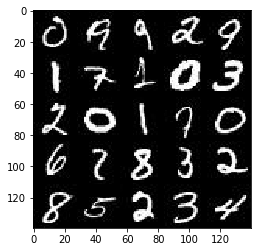

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

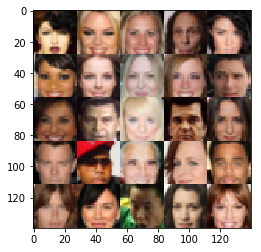

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_input = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, (None), name='learning_rate')
    

    return real_input, z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [25]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.2
        keep_probability=0.9
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        relu1 = tf.maximum(alpha * x1, x1)
        
        d1 = tf.nn.dropout(relu1, keep_probability)
        
        x2 = tf.layers.conv2d(d1, 128, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        d2 = tf.nn.dropout(relu2, keep_probability)
        
        x3 = tf.layers.conv2d(d2, 256, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)


        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [26]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=(not is_train)):
        
        alpha = 0.2
        keep_prob = 0.5

        x1 = tf.layers.dense(z, 7*7*512)

        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #print(x1.shape)
        
        d1 = tf.nn.dropout(x1, keep_prob)
        
        x2 = tf.layers.conv2d_transpose(d1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #print(x2.shape)
        
        d2 = tf.nn.dropout(x2, keep_prob)
        
        x3 = tf.layers.conv2d_transpose(d2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #print(x3.shape)
        
        d3 = tf.nn.dropout(x3, keep_prob)
    
        x4 = tf.layers.conv2d_transpose(d3, 64, 5, strides=1, padding='same')
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        #print(x4.shape)
        
        d4 = tf.nn.dropout(x4, keep_prob)
        
#         x5 = tf.layers.conv2d_transpose(x4, 64, 5, strides=2, padding='valid')
#         x5 = tf.layers.batch_normalization(x5, training=is_train)
#         x5 = tf.maximum(alpha * x5, x5)
#         print(x5.shape)
        
        # Output layer
        logits = tf.layers.conv2d_transpose(d4, out_channel_dim, 5, strides=1, padding='same')
        #print(logits.shape)
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [27]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    alpha = 0.02
    smooth = 0.1
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=(tf.ones_like(d_model_real) * (1 - smooth))))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [28]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    all_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

    g_update_ops = [var for var in all_update_ops if var.name.startswith('generator')]
    d_update_ops = [var for var in all_update_ops if var.name.startswith('discriminator')]

    with tf.control_dependencies(d_update_ops):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list = d_vars)

    with tf.control_dependencies(g_update_ops):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(g_loss, var_list = g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [29]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [32]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
# TODO: Build Model
    #saver = tf.train.Saver()
    
    sample_z = np.random.uniform(-1, 1, size=(72, z_dim))

    samples, losses = [], []
    steps = 0
    
    #tf.reset_default_graph()
    
    #print(data_shape)
    
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                # TODO: Train Model
                batch_images = batch_images.reshape(batch_size, data_shape[1], data_shape[2], data_shape[3])
                batch_images *= 2
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, input_real: batch_images, lr: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, input_real: batch_images, lr: learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 20, input_z, data_shape[3], data_image_mode)

#         saver.save(sess, './checkpoints/generator.ckpt')

#     with open('samples.pkl', 'wb') as f:
#         pkl.dump(samples, f)
    
    show_generator_output(sess, 20, input_z, data_shape[3], data_image_mode)
    
    return losses, samples
                
         

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.7902... Generator Loss: 1.7254
Epoch 1/2... Discriminator Loss: 0.9632... Generator Loss: 2.5739
Epoch 1/2... Discriminator Loss: 1.8868... Generator Loss: 0.3963
Epoch 1/2... Discriminator Loss: 1.1541... Generator Loss: 1.5606
Epoch 1/2... Discriminator Loss: 0.9046... Generator Loss: 1.1660
Epoch 1/2... Discriminator Loss: 1.3856... Generator Loss: 0.7632
Epoch 1/2... Discriminator Loss: 1.5232... Generator Loss: 0.9923
Epoch 1/2... Discriminator Loss: 1.9573... Generator Loss: 0.4841
Epoch 1/2... Discriminator Loss: 1.5855... Generator Loss: 0.6426
Epoch 1/2... Discriminator Loss: 1.5110... Generator Loss: 1.0470
Epoch 1/2... Discriminator Loss: 1.2314... Generator Loss: 0.9283
Epoch 1/2... Discriminator Loss: 1.1745... Generator Loss: 1.2855
Epoch 1/2... Discriminator Loss: 1.7020... Generator Loss: 2.0742
Epoch 1/2... Discriminator Loss: 1.2260... Generator Loss: 1.4685
Epoch 1/2... Discriminator Loss: 1.2896... Generator Loss: 1.5573
Epoch 1/2.

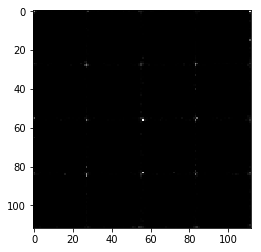

Epoch 1/2... Discriminator Loss: 1.2154... Generator Loss: 0.7424
Epoch 1/2... Discriminator Loss: 1.1922... Generator Loss: 0.9693
Epoch 1/2... Discriminator Loss: 1.1848... Generator Loss: 1.3075
Epoch 1/2... Discriminator Loss: 1.3775... Generator Loss: 2.0561
Epoch 1/2... Discriminator Loss: 1.2563... Generator Loss: 1.1225
Epoch 1/2... Discriminator Loss: 1.3272... Generator Loss: 1.1569
Epoch 1/2... Discriminator Loss: 1.2547... Generator Loss: 2.0781
Epoch 1/2... Discriminator Loss: 1.1180... Generator Loss: 0.9746
Epoch 1/2... Discriminator Loss: 1.1215... Generator Loss: 1.9920
Epoch 1/2... Discriminator Loss: 1.1860... Generator Loss: 1.0920
Epoch 1/2... Discriminator Loss: 1.0989... Generator Loss: 1.0324
Epoch 1/2... Discriminator Loss: 1.0901... Generator Loss: 1.0383
Epoch 1/2... Discriminator Loss: 1.3229... Generator Loss: 2.0617
Epoch 1/2... Discriminator Loss: 1.1204... Generator Loss: 0.9453
Epoch 1/2... Discriminator Loss: 1.2102... Generator Loss: 0.6694
Epoch 1/2.

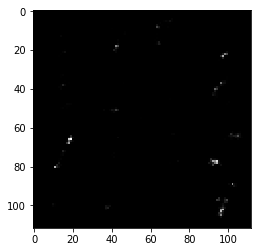

Epoch 1/2... Discriminator Loss: 1.4172... Generator Loss: 0.6449
Epoch 1/2... Discriminator Loss: 1.0098... Generator Loss: 1.2665
Epoch 1/2... Discriminator Loss: 1.0648... Generator Loss: 0.9940
Epoch 1/2... Discriminator Loss: 1.1178... Generator Loss: 1.2851
Epoch 1/2... Discriminator Loss: 1.1214... Generator Loss: 0.9923
Epoch 1/2... Discriminator Loss: 1.0835... Generator Loss: 1.0750
Epoch 1/2... Discriminator Loss: 1.1337... Generator Loss: 1.8968
Epoch 1/2... Discriminator Loss: 1.1228... Generator Loss: 1.2869
Epoch 1/2... Discriminator Loss: 1.1066... Generator Loss: 1.1892
Epoch 1/2... Discriminator Loss: 1.1191... Generator Loss: 1.6638
Epoch 1/2... Discriminator Loss: 1.0922... Generator Loss: 0.9842
Epoch 1/2... Discriminator Loss: 1.0766... Generator Loss: 1.3337
Epoch 1/2... Discriminator Loss: 1.0997... Generator Loss: 1.0117
Epoch 1/2... Discriminator Loss: 1.2001... Generator Loss: 0.7250
Epoch 1/2... Discriminator Loss: 0.9622... Generator Loss: 1.4013
Epoch 1/2.

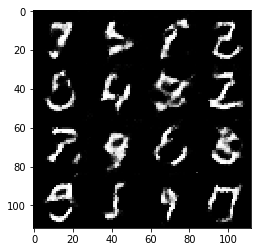

Epoch 1/2... Discriminator Loss: 1.1460... Generator Loss: 1.4426
Epoch 1/2... Discriminator Loss: 1.1854... Generator Loss: 0.9029
Epoch 1/2... Discriminator Loss: 1.2070... Generator Loss: 0.8219
Epoch 1/2... Discriminator Loss: 1.0574... Generator Loss: 1.2389
Epoch 1/2... Discriminator Loss: 1.0853... Generator Loss: 1.2164
Epoch 1/2... Discriminator Loss: 1.1746... Generator Loss: 1.4091
Epoch 1/2... Discriminator Loss: 1.1501... Generator Loss: 0.8988
Epoch 1/2... Discriminator Loss: 1.1389... Generator Loss: 0.9465
Epoch 1/2... Discriminator Loss: 1.1250... Generator Loss: 1.1110
Epoch 1/2... Discriminator Loss: 1.0686... Generator Loss: 0.9526
Epoch 1/2... Discriminator Loss: 1.0946... Generator Loss: 1.5615
Epoch 1/2... Discriminator Loss: 1.2054... Generator Loss: 0.9912
Epoch 1/2... Discriminator Loss: 1.1367... Generator Loss: 1.1481
Epoch 1/2... Discriminator Loss: 1.3455... Generator Loss: 1.7931
Epoch 1/2... Discriminator Loss: 1.2680... Generator Loss: 1.7887
Epoch 1/2.

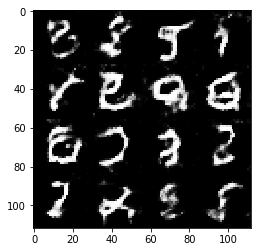

Epoch 1/2... Discriminator Loss: 1.0585... Generator Loss: 1.0327
Epoch 1/2... Discriminator Loss: 1.1561... Generator Loss: 0.9968
Epoch 1/2... Discriminator Loss: 1.1593... Generator Loss: 0.9841
Epoch 1/2... Discriminator Loss: 1.2481... Generator Loss: 0.8297
Epoch 1/2... Discriminator Loss: 1.0715... Generator Loss: 1.0200
Epoch 1/2... Discriminator Loss: 1.1664... Generator Loss: 1.5916
Epoch 1/2... Discriminator Loss: 1.2043... Generator Loss: 0.8376
Epoch 1/2... Discriminator Loss: 1.2365... Generator Loss: 0.7381
Epoch 1/2... Discriminator Loss: 1.2275... Generator Loss: 1.0231
Epoch 1/2... Discriminator Loss: 1.1153... Generator Loss: 1.1615
Epoch 1/2... Discriminator Loss: 1.2239... Generator Loss: 1.1828
Epoch 1/2... Discriminator Loss: 1.1461... Generator Loss: 0.9943
Epoch 1/2... Discriminator Loss: 1.1848... Generator Loss: 1.2872
Epoch 1/2... Discriminator Loss: 1.1443... Generator Loss: 1.4961
Epoch 1/2... Discriminator Loss: 1.0941... Generator Loss: 1.0793
Epoch 1/2.

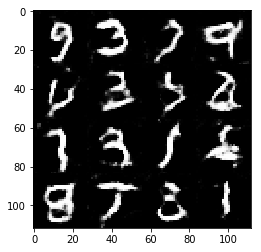

Epoch 1/2... Discriminator Loss: 1.2093... Generator Loss: 1.1562
Epoch 1/2... Discriminator Loss: 1.1297... Generator Loss: 1.3823
Epoch 1/2... Discriminator Loss: 1.1496... Generator Loss: 0.9559
Epoch 1/2... Discriminator Loss: 1.0647... Generator Loss: 0.9273
Epoch 1/2... Discriminator Loss: 1.1050... Generator Loss: 0.9748
Epoch 1/2... Discriminator Loss: 1.0843... Generator Loss: 1.1913
Epoch 1/2... Discriminator Loss: 1.1491... Generator Loss: 1.3978
Epoch 1/2... Discriminator Loss: 1.0619... Generator Loss: 1.1314
Epoch 1/2... Discriminator Loss: 1.2262... Generator Loss: 0.8246
Epoch 1/2... Discriminator Loss: 1.1727... Generator Loss: 0.9320
Epoch 1/2... Discriminator Loss: 1.0878... Generator Loss: 1.0307
Epoch 1/2... Discriminator Loss: 1.0943... Generator Loss: 1.0938
Epoch 1/2... Discriminator Loss: 1.0358... Generator Loss: 1.5423
Epoch 1/2... Discriminator Loss: 1.1299... Generator Loss: 1.2897
Epoch 1/2... Discriminator Loss: 1.0915... Generator Loss: 0.8884
Epoch 1/2.

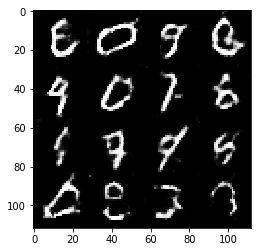

Epoch 1/2... Discriminator Loss: 1.1257... Generator Loss: 1.0091
Epoch 1/2... Discriminator Loss: 1.3630... Generator Loss: 0.7445
Epoch 1/2... Discriminator Loss: 1.1051... Generator Loss: 0.8143
Epoch 1/2... Discriminator Loss: 1.1383... Generator Loss: 0.9608
Epoch 1/2... Discriminator Loss: 1.1397... Generator Loss: 1.1864
Epoch 1/2... Discriminator Loss: 1.0364... Generator Loss: 1.1792
Epoch 1/2... Discriminator Loss: 1.0895... Generator Loss: 0.9993
Epoch 1/2... Discriminator Loss: 1.1383... Generator Loss: 1.1071
Epoch 1/2... Discriminator Loss: 1.1683... Generator Loss: 0.8464
Epoch 1/2... Discriminator Loss: 1.2254... Generator Loss: 0.6974
Epoch 1/2... Discriminator Loss: 1.2153... Generator Loss: 1.7024
Epoch 1/2... Discriminator Loss: 1.1739... Generator Loss: 1.0405
Epoch 1/2... Discriminator Loss: 1.1201... Generator Loss: 1.0096
Epoch 1/2... Discriminator Loss: 1.1432... Generator Loss: 0.8171
Epoch 1/2... Discriminator Loss: 1.1023... Generator Loss: 1.1578
Epoch 1/2.

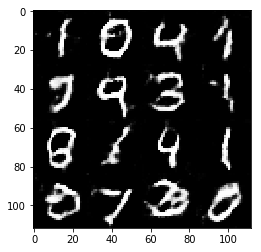

Epoch 1/2... Discriminator Loss: 1.1459... Generator Loss: 1.0277
Epoch 1/2... Discriminator Loss: 1.0995... Generator Loss: 1.1169
Epoch 1/2... Discriminator Loss: 1.0274... Generator Loss: 1.0883
Epoch 1/2... Discriminator Loss: 1.1775... Generator Loss: 0.9159
Epoch 1/2... Discriminator Loss: 1.1456... Generator Loss: 1.1516
Epoch 1/2... Discriminator Loss: 1.1042... Generator Loss: 0.9432
Epoch 1/2... Discriminator Loss: 1.1618... Generator Loss: 1.0683
Epoch 1/2... Discriminator Loss: 1.2131... Generator Loss: 1.1794
Epoch 1/2... Discriminator Loss: 1.1705... Generator Loss: 0.8716
Epoch 1/2... Discriminator Loss: 1.1536... Generator Loss: 0.8531
Epoch 1/2... Discriminator Loss: 1.2372... Generator Loss: 1.4156
Epoch 1/2... Discriminator Loss: 1.0680... Generator Loss: 1.2269
Epoch 1/2... Discriminator Loss: 1.0758... Generator Loss: 0.9551
Epoch 1/2... Discriminator Loss: 1.1215... Generator Loss: 1.4055
Epoch 1/2... Discriminator Loss: 1.1682... Generator Loss: 0.9773
Epoch 1/2.

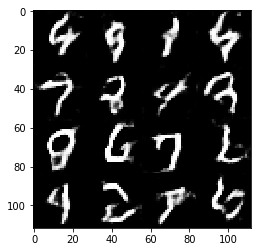

Epoch 1/2... Discriminator Loss: 1.1151... Generator Loss: 1.0083
Epoch 1/2... Discriminator Loss: 1.2156... Generator Loss: 0.7745
Epoch 1/2... Discriminator Loss: 1.1429... Generator Loss: 1.0191
Epoch 1/2... Discriminator Loss: 1.1072... Generator Loss: 1.6126
Epoch 1/2... Discriminator Loss: 1.2399... Generator Loss: 1.0445
Epoch 1/2... Discriminator Loss: 1.0914... Generator Loss: 1.4392
Epoch 1/2... Discriminator Loss: 1.0033... Generator Loss: 1.3386
Epoch 1/2... Discriminator Loss: 1.1467... Generator Loss: 1.1770
Epoch 1/2... Discriminator Loss: 1.1836... Generator Loss: 1.3521
Epoch 1/2... Discriminator Loss: 1.1935... Generator Loss: 1.1146
Epoch 1/2... Discriminator Loss: 1.1774... Generator Loss: 0.8995
Epoch 1/2... Discriminator Loss: 1.1249... Generator Loss: 1.0490
Epoch 1/2... Discriminator Loss: 1.2201... Generator Loss: 1.6229
Epoch 1/2... Discriminator Loss: 1.0555... Generator Loss: 1.0257
Epoch 1/2... Discriminator Loss: 1.1247... Generator Loss: 1.3037
Epoch 1/2.

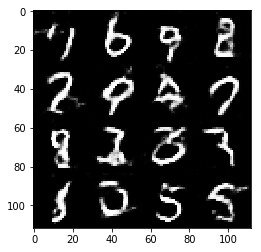

Epoch 1/2... Discriminator Loss: 1.0817... Generator Loss: 1.1882
Epoch 1/2... Discriminator Loss: 1.1884... Generator Loss: 0.8449
Epoch 1/2... Discriminator Loss: 1.2355... Generator Loss: 0.7398
Epoch 1/2... Discriminator Loss: 1.1050... Generator Loss: 1.2855
Epoch 1/2... Discriminator Loss: 1.1265... Generator Loss: 0.8325
Epoch 1/2... Discriminator Loss: 1.0397... Generator Loss: 0.9813
Epoch 1/2... Discriminator Loss: 1.0257... Generator Loss: 1.0454
Epoch 2/2... Discriminator Loss: 1.0476... Generator Loss: 1.6257
Epoch 2/2... Discriminator Loss: 1.1686... Generator Loss: 1.0039
Epoch 2/2... Discriminator Loss: 1.1345... Generator Loss: 1.3930
Epoch 2/2... Discriminator Loss: 1.1014... Generator Loss: 1.2929
Epoch 2/2... Discriminator Loss: 0.9789... Generator Loss: 1.2812
Epoch 2/2... Discriminator Loss: 1.1167... Generator Loss: 1.0567
Epoch 2/2... Discriminator Loss: 1.0679... Generator Loss: 0.9781
Epoch 2/2... Discriminator Loss: 1.1223... Generator Loss: 1.1918
Epoch 2/2.

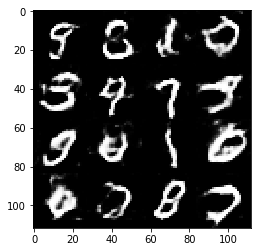

Epoch 2/2... Discriminator Loss: 1.1104... Generator Loss: 1.5612
Epoch 2/2... Discriminator Loss: 1.0069... Generator Loss: 1.2386
Epoch 2/2... Discriminator Loss: 1.1663... Generator Loss: 0.9732
Epoch 2/2... Discriminator Loss: 1.0165... Generator Loss: 1.5957
Epoch 2/2... Discriminator Loss: 1.1831... Generator Loss: 1.5853
Epoch 2/2... Discriminator Loss: 1.0992... Generator Loss: 1.5041
Epoch 2/2... Discriminator Loss: 1.0464... Generator Loss: 1.3034
Epoch 2/2... Discriminator Loss: 1.0980... Generator Loss: 1.0780
Epoch 2/2... Discriminator Loss: 1.0104... Generator Loss: 1.6742
Epoch 2/2... Discriminator Loss: 1.0882... Generator Loss: 1.2167
Epoch 2/2... Discriminator Loss: 1.1772... Generator Loss: 1.4174
Epoch 2/2... Discriminator Loss: 1.1015... Generator Loss: 1.0839
Epoch 2/2... Discriminator Loss: 1.0563... Generator Loss: 0.8643
Epoch 2/2... Discriminator Loss: 1.1289... Generator Loss: 0.9209
Epoch 2/2... Discriminator Loss: 1.1122... Generator Loss: 1.0537
Epoch 2/2.

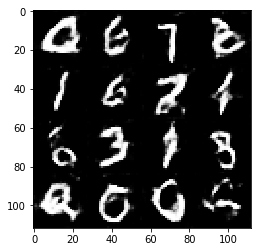

Epoch 2/2... Discriminator Loss: 1.0973... Generator Loss: 1.2265
Epoch 2/2... Discriminator Loss: 1.1039... Generator Loss: 1.3750
Epoch 2/2... Discriminator Loss: 1.0062... Generator Loss: 1.2137
Epoch 2/2... Discriminator Loss: 1.1705... Generator Loss: 1.6844
Epoch 2/2... Discriminator Loss: 1.0671... Generator Loss: 1.3924
Epoch 2/2... Discriminator Loss: 1.1450... Generator Loss: 1.2428
Epoch 2/2... Discriminator Loss: 1.1071... Generator Loss: 1.2720
Epoch 2/2... Discriminator Loss: 1.1326... Generator Loss: 0.8117
Epoch 2/2... Discriminator Loss: 1.0901... Generator Loss: 0.9439
Epoch 2/2... Discriminator Loss: 1.1140... Generator Loss: 0.9503
Epoch 2/2... Discriminator Loss: 0.9822... Generator Loss: 0.9917
Epoch 2/2... Discriminator Loss: 1.0803... Generator Loss: 0.9234
Epoch 2/2... Discriminator Loss: 1.1317... Generator Loss: 1.5485
Epoch 2/2... Discriminator Loss: 1.3369... Generator Loss: 2.1447
Epoch 2/2... Discriminator Loss: 1.1327... Generator Loss: 1.1981
Epoch 2/2.

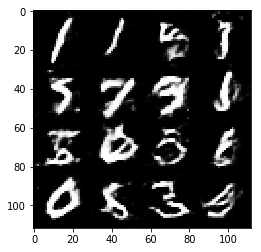

Epoch 2/2... Discriminator Loss: 1.2234... Generator Loss: 0.8097
Epoch 2/2... Discriminator Loss: 1.0203... Generator Loss: 1.1438
Epoch 2/2... Discriminator Loss: 1.0409... Generator Loss: 1.1396
Epoch 2/2... Discriminator Loss: 1.0289... Generator Loss: 1.1800
Epoch 2/2... Discriminator Loss: 1.0415... Generator Loss: 1.1294
Epoch 2/2... Discriminator Loss: 1.1450... Generator Loss: 0.9757
Epoch 2/2... Discriminator Loss: 1.0716... Generator Loss: 0.8726
Epoch 2/2... Discriminator Loss: 1.0596... Generator Loss: 1.0637
Epoch 2/2... Discriminator Loss: 1.1341... Generator Loss: 1.6233
Epoch 2/2... Discriminator Loss: 1.0595... Generator Loss: 1.4165
Epoch 2/2... Discriminator Loss: 1.0301... Generator Loss: 1.0737
Epoch 2/2... Discriminator Loss: 1.1965... Generator Loss: 0.8580
Epoch 2/2... Discriminator Loss: 1.1007... Generator Loss: 0.9390
Epoch 2/2... Discriminator Loss: 1.1236... Generator Loss: 1.3763
Epoch 2/2... Discriminator Loss: 1.0315... Generator Loss: 1.0584
Epoch 2/2.

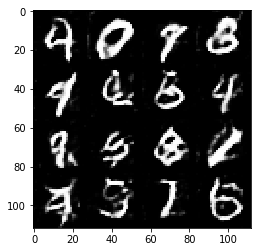

Epoch 2/2... Discriminator Loss: 1.1417... Generator Loss: 0.8869
Epoch 2/2... Discriminator Loss: 1.0717... Generator Loss: 0.8441
Epoch 2/2... Discriminator Loss: 1.1334... Generator Loss: 0.9072
Epoch 2/2... Discriminator Loss: 1.1435... Generator Loss: 1.0732
Epoch 2/2... Discriminator Loss: 1.1218... Generator Loss: 1.1613
Epoch 2/2... Discriminator Loss: 1.1418... Generator Loss: 1.4386
Epoch 2/2... Discriminator Loss: 1.0189... Generator Loss: 0.9503
Epoch 2/2... Discriminator Loss: 1.2219... Generator Loss: 0.9388
Epoch 2/2... Discriminator Loss: 1.0558... Generator Loss: 0.8424
Epoch 2/2... Discriminator Loss: 1.0964... Generator Loss: 1.1447
Epoch 2/2... Discriminator Loss: 1.0846... Generator Loss: 1.1067
Epoch 2/2... Discriminator Loss: 1.1166... Generator Loss: 1.0237
Epoch 2/2... Discriminator Loss: 1.0743... Generator Loss: 1.2501
Epoch 2/2... Discriminator Loss: 0.9908... Generator Loss: 1.2670
Epoch 2/2... Discriminator Loss: 1.1484... Generator Loss: 1.1937
Epoch 2/2.

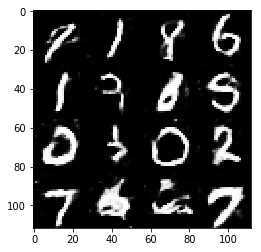

Epoch 2/2... Discriminator Loss: 1.3211... Generator Loss: 0.6514
Epoch 2/2... Discriminator Loss: 1.0470... Generator Loss: 0.8632
Epoch 2/2... Discriminator Loss: 1.0613... Generator Loss: 1.1073
Epoch 2/2... Discriminator Loss: 1.2731... Generator Loss: 1.0436
Epoch 2/2... Discriminator Loss: 1.0535... Generator Loss: 0.9359
Epoch 2/2... Discriminator Loss: 0.9868... Generator Loss: 1.4090
Epoch 2/2... Discriminator Loss: 1.1508... Generator Loss: 0.9007
Epoch 2/2... Discriminator Loss: 1.1142... Generator Loss: 1.4191
Epoch 2/2... Discriminator Loss: 1.0747... Generator Loss: 1.0585
Epoch 2/2... Discriminator Loss: 1.1973... Generator Loss: 0.9631
Epoch 2/2... Discriminator Loss: 1.1743... Generator Loss: 1.3877
Epoch 2/2... Discriminator Loss: 1.0681... Generator Loss: 1.5700
Epoch 2/2... Discriminator Loss: 1.0116... Generator Loss: 1.1408
Epoch 2/2... Discriminator Loss: 1.0078... Generator Loss: 0.9532
Epoch 2/2... Discriminator Loss: 1.1712... Generator Loss: 0.7848
Epoch 2/2.

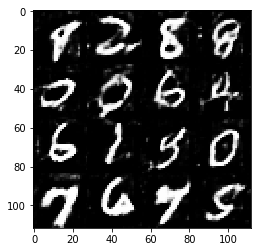

Epoch 2/2... Discriminator Loss: 1.0920... Generator Loss: 1.3316
Epoch 2/2... Discriminator Loss: 1.3981... Generator Loss: 0.5876
Epoch 2/2... Discriminator Loss: 1.1691... Generator Loss: 0.8900
Epoch 2/2... Discriminator Loss: 1.1106... Generator Loss: 1.0675
Epoch 2/2... Discriminator Loss: 1.0951... Generator Loss: 1.0197
Epoch 2/2... Discriminator Loss: 1.0263... Generator Loss: 1.3363
Epoch 2/2... Discriminator Loss: 1.0279... Generator Loss: 0.9684
Epoch 2/2... Discriminator Loss: 1.0193... Generator Loss: 0.9678
Epoch 2/2... Discriminator Loss: 1.0841... Generator Loss: 0.8816
Epoch 2/2... Discriminator Loss: 1.1225... Generator Loss: 0.8572
Epoch 2/2... Discriminator Loss: 1.1065... Generator Loss: 1.2700
Epoch 2/2... Discriminator Loss: 1.1221... Generator Loss: 0.8945
Epoch 2/2... Discriminator Loss: 0.9455... Generator Loss: 1.4612
Epoch 2/2... Discriminator Loss: 1.0245... Generator Loss: 1.1618
Epoch 2/2... Discriminator Loss: 0.9421... Generator Loss: 1.1033
Epoch 2/2.

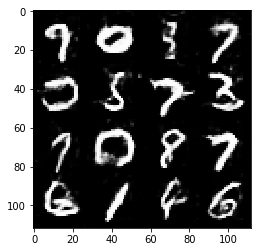

Epoch 2/2... Discriminator Loss: 1.0217... Generator Loss: 1.2032
Epoch 2/2... Discriminator Loss: 1.0590... Generator Loss: 0.8531
Epoch 2/2... Discriminator Loss: 1.0063... Generator Loss: 1.1993
Epoch 2/2... Discriminator Loss: 1.0389... Generator Loss: 1.2726
Epoch 2/2... Discriminator Loss: 1.2356... Generator Loss: 0.7373
Epoch 2/2... Discriminator Loss: 1.0406... Generator Loss: 1.2942
Epoch 2/2... Discriminator Loss: 1.0478... Generator Loss: 1.1828
Epoch 2/2... Discriminator Loss: 0.9701... Generator Loss: 1.2998
Epoch 2/2... Discriminator Loss: 1.0670... Generator Loss: 0.9793
Epoch 2/2... Discriminator Loss: 1.0589... Generator Loss: 0.9297
Epoch 2/2... Discriminator Loss: 0.9463... Generator Loss: 1.5211
Epoch 2/2... Discriminator Loss: 1.0210... Generator Loss: 1.1704
Epoch 2/2... Discriminator Loss: 1.0903... Generator Loss: 1.4337
Epoch 2/2... Discriminator Loss: 1.0605... Generator Loss: 1.0617
Epoch 2/2... Discriminator Loss: 1.1319... Generator Loss: 1.1522
Epoch 2/2.

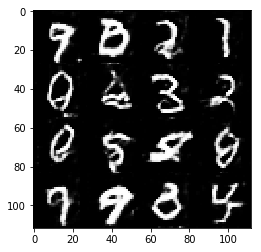

Epoch 2/2... Discriminator Loss: 0.9429... Generator Loss: 1.0119
Epoch 2/2... Discriminator Loss: 1.0854... Generator Loss: 0.9711
Epoch 2/2... Discriminator Loss: 1.1372... Generator Loss: 0.8868
Epoch 2/2... Discriminator Loss: 1.0712... Generator Loss: 1.1837
Epoch 2/2... Discriminator Loss: 1.0901... Generator Loss: 1.3393
Epoch 2/2... Discriminator Loss: 1.0562... Generator Loss: 0.8401
Epoch 2/2... Discriminator Loss: 1.2239... Generator Loss: 0.8457
Epoch 2/2... Discriminator Loss: 1.1737... Generator Loss: 1.4200
Epoch 2/2... Discriminator Loss: 0.8959... Generator Loss: 1.2714
Epoch 2/2... Discriminator Loss: 1.3082... Generator Loss: 0.6430
Epoch 2/2... Discriminator Loss: 1.0080... Generator Loss: 1.0863
Epoch 2/2... Discriminator Loss: 1.1029... Generator Loss: 1.1074
Epoch 2/2... Discriminator Loss: 0.9423... Generator Loss: 1.2151
Epoch 2/2... Discriminator Loss: 1.0412... Generator Loss: 1.2743
Epoch 2/2... Discriminator Loss: 1.0422... Generator Loss: 1.3209
Epoch 2/2.

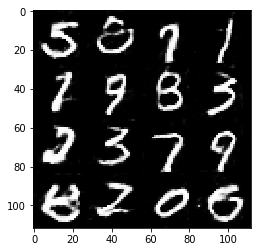

Epoch 2/2... Discriminator Loss: 1.0279... Generator Loss: 1.0813
Epoch 2/2... Discriminator Loss: 1.1128... Generator Loss: 0.8965
Epoch 2/2... Discriminator Loss: 1.0823... Generator Loss: 0.8417
Epoch 2/2... Discriminator Loss: 1.0335... Generator Loss: 1.1232
Epoch 2/2... Discriminator Loss: 1.6992... Generator Loss: 0.3767
Epoch 2/2... Discriminator Loss: 1.5076... Generator Loss: 0.6174
Epoch 2/2... Discriminator Loss: 1.1771... Generator Loss: 0.9967
Epoch 2/2... Discriminator Loss: 1.0208... Generator Loss: 1.2201
Epoch 2/2... Discriminator Loss: 1.0129... Generator Loss: 1.3208
Epoch 2/2... Discriminator Loss: 0.9582... Generator Loss: 1.3671
Epoch 2/2... Discriminator Loss: 1.0083... Generator Loss: 1.2433
Epoch 2/2... Discriminator Loss: 0.9212... Generator Loss: 1.2819
Epoch 2/2... Discriminator Loss: 1.0308... Generator Loss: 1.0033
Epoch 2/2... Discriminator Loss: 0.9881... Generator Loss: 1.2540


RuntimeError: Attempted to use a closed Session.

In [33]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

smooth = 0.1

print_every = 5
show_every = 100



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.5115... Generator Loss: 2.3266
Epoch 1/1... Discriminator Loss: 0.5042... Generator Loss: 2.9214
Epoch 1/1... Discriminator Loss: 0.5263... Generator Loss: 2.6969
Epoch 1/1... Discriminator Loss: 0.6903... Generator Loss: 2.1411


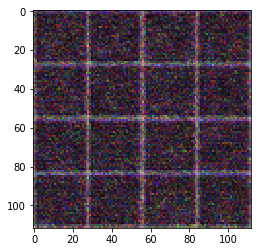

Epoch 1/1... Discriminator Loss: 0.5821... Generator Loss: 1.9652
Epoch 1/1... Discriminator Loss: 0.6648... Generator Loss: 3.7728
Epoch 1/1... Discriminator Loss: 0.6225... Generator Loss: 1.7895
Epoch 1/1... Discriminator Loss: 1.1006... Generator Loss: 1.3659


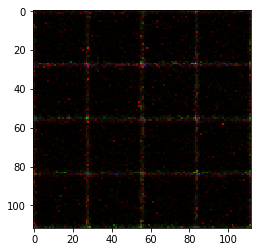

Epoch 1/1... Discriminator Loss: 0.7248... Generator Loss: 1.6401
Epoch 1/1... Discriminator Loss: 0.6583... Generator Loss: 2.3241
Epoch 1/1... Discriminator Loss: 0.6896... Generator Loss: 2.1070
Epoch 1/1... Discriminator Loss: 0.4795... Generator Loss: 3.4652


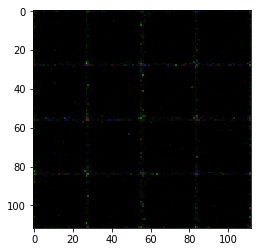

Epoch 1/1... Discriminator Loss: 0.5638... Generator Loss: 3.1492
Epoch 1/1... Discriminator Loss: 0.6184... Generator Loss: 2.4958
Epoch 1/1... Discriminator Loss: 0.4953... Generator Loss: 2.7527
Epoch 1/1... Discriminator Loss: 0.4927... Generator Loss: 2.9522


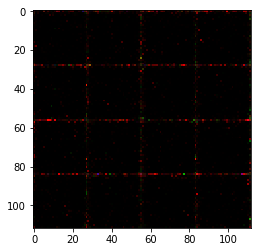

Epoch 1/1... Discriminator Loss: 0.4389... Generator Loss: 3.3173
Epoch 1/1... Discriminator Loss: 0.5934... Generator Loss: 2.5254
Epoch 1/1... Discriminator Loss: 0.4498... Generator Loss: 3.7576
Epoch 1/1... Discriminator Loss: 0.4610... Generator Loss: 3.5509


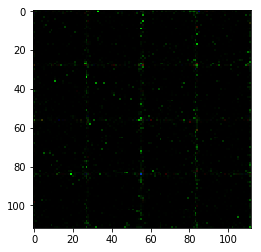

Epoch 1/1... Discriminator Loss: 0.4697... Generator Loss: 3.0088
Epoch 1/1... Discriminator Loss: 1.5132... Generator Loss: 0.7608
Epoch 1/1... Discriminator Loss: 0.4443... Generator Loss: 4.4216
Epoch 1/1... Discriminator Loss: 0.3970... Generator Loss: 3.6058


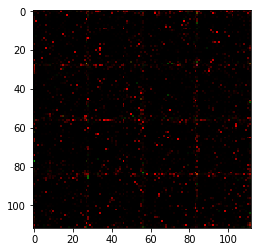

Epoch 1/1... Discriminator Loss: 0.4920... Generator Loss: 3.7623
Epoch 1/1... Discriminator Loss: 0.5043... Generator Loss: 2.4404
Epoch 1/1... Discriminator Loss: 0.4480... Generator Loss: 3.5040
Epoch 1/1... Discriminator Loss: 0.5089... Generator Loss: 4.2856


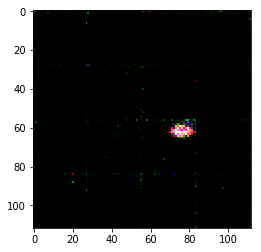

Epoch 1/1... Discriminator Loss: 0.5532... Generator Loss: 2.6661
Epoch 1/1... Discriminator Loss: 0.4483... Generator Loss: 2.9389
Epoch 1/1... Discriminator Loss: 0.5874... Generator Loss: 3.0143
Epoch 1/1... Discriminator Loss: 0.4790... Generator Loss: 3.7814


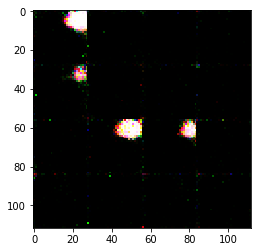

Epoch 1/1... Discriminator Loss: 0.7531... Generator Loss: 1.3370
Epoch 1/1... Discriminator Loss: 0.5302... Generator Loss: 2.9462
Epoch 1/1... Discriminator Loss: 0.4112... Generator Loss: 4.0722
Epoch 1/1... Discriminator Loss: 0.5051... Generator Loss: 3.3317


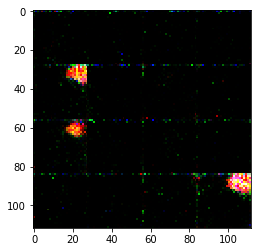

Epoch 1/1... Discriminator Loss: 0.6955... Generator Loss: 1.8856
Epoch 1/1... Discriminator Loss: 0.6470... Generator Loss: 1.9649
Epoch 1/1... Discriminator Loss: 0.5542... Generator Loss: 2.9299
Epoch 1/1... Discriminator Loss: 0.6758... Generator Loss: 2.5580


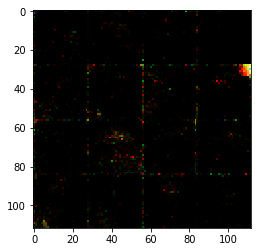

Epoch 1/1... Discriminator Loss: 0.5554... Generator Loss: 1.9428
Epoch 1/1... Discriminator Loss: 0.5315... Generator Loss: 2.7161
Epoch 1/1... Discriminator Loss: 1.3617... Generator Loss: 4.6338
Epoch 1/1... Discriminator Loss: 0.7577... Generator Loss: 1.6460


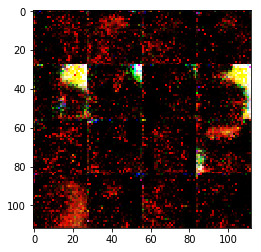

Epoch 1/1... Discriminator Loss: 1.0322... Generator Loss: 1.1011
Epoch 1/1... Discriminator Loss: 0.7891... Generator Loss: 1.4679
Epoch 1/1... Discriminator Loss: 0.7505... Generator Loss: 1.5212
Epoch 1/1... Discriminator Loss: 1.2536... Generator Loss: 0.7677


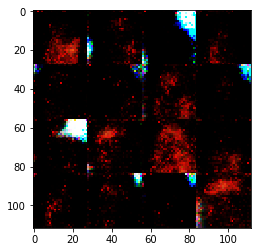

Epoch 1/1... Discriminator Loss: 1.0157... Generator Loss: 1.0926
Epoch 1/1... Discriminator Loss: 0.7060... Generator Loss: 1.9066
Epoch 1/1... Discriminator Loss: 0.9242... Generator Loss: 4.0297
Epoch 1/1... Discriminator Loss: 0.8110... Generator Loss: 1.3009


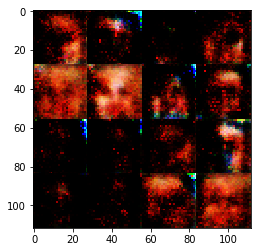

Epoch 1/1... Discriminator Loss: 1.6891... Generator Loss: 0.6908
Epoch 1/1... Discriminator Loss: 1.4459... Generator Loss: 0.7413
Epoch 1/1... Discriminator Loss: 1.6433... Generator Loss: 0.4216
Epoch 1/1... Discriminator Loss: 0.8436... Generator Loss: 2.2969


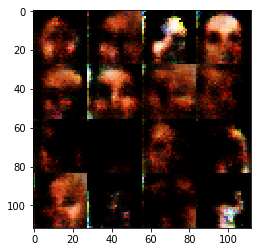

Epoch 1/1... Discriminator Loss: 1.0965... Generator Loss: 1.1442
Epoch 1/1... Discriminator Loss: 1.0373... Generator Loss: 2.4142
Epoch 1/1... Discriminator Loss: 1.0558... Generator Loss: 1.0319
Epoch 1/1... Discriminator Loss: 1.5973... Generator Loss: 0.6860


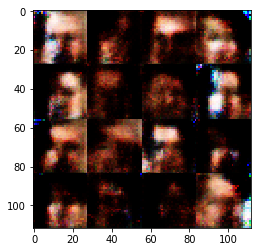

Epoch 1/1... Discriminator Loss: 1.0161... Generator Loss: 0.9902
Epoch 1/1... Discriminator Loss: 1.5192... Generator Loss: 3.6905
Epoch 1/1... Discriminator Loss: 1.9910... Generator Loss: 0.2924
Epoch 1/1... Discriminator Loss: 0.9866... Generator Loss: 1.2745


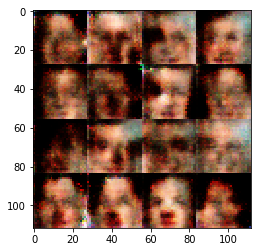

Epoch 1/1... Discriminator Loss: 1.2772... Generator Loss: 1.0166
Epoch 1/1... Discriminator Loss: 0.9962... Generator Loss: 1.4174
Epoch 1/1... Discriminator Loss: 0.8432... Generator Loss: 1.6557
Epoch 1/1... Discriminator Loss: 0.9756... Generator Loss: 1.4709


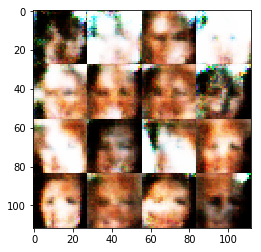

Epoch 1/1... Discriminator Loss: 1.1474... Generator Loss: 1.3625
Epoch 1/1... Discriminator Loss: 1.2949... Generator Loss: 1.4938
Epoch 1/1... Discriminator Loss: 1.0781... Generator Loss: 1.7280
Epoch 1/1... Discriminator Loss: 1.0690... Generator Loss: 1.3875


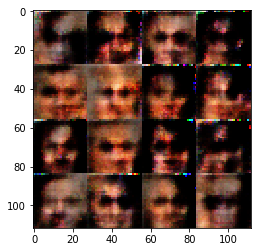

Epoch 1/1... Discriminator Loss: 0.9576... Generator Loss: 3.1145
Epoch 1/1... Discriminator Loss: 0.9725... Generator Loss: 1.5900
Epoch 1/1... Discriminator Loss: 1.4868... Generator Loss: 0.7935
Epoch 1/1... Discriminator Loss: 0.8882... Generator Loss: 1.5674


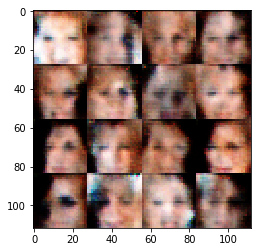

Epoch 1/1... Discriminator Loss: 0.8880... Generator Loss: 1.4221
Epoch 1/1... Discriminator Loss: 1.0613... Generator Loss: 1.1514
Epoch 1/1... Discriminator Loss: 1.4850... Generator Loss: 0.7051
Epoch 1/1... Discriminator Loss: 1.1718... Generator Loss: 2.0344


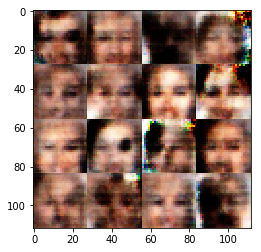

Epoch 1/1... Discriminator Loss: 0.9984... Generator Loss: 1.6516
Epoch 1/1... Discriminator Loss: 1.3068... Generator Loss: 0.8656
Epoch 1/1... Discriminator Loss: 1.1827... Generator Loss: 0.7822
Epoch 1/1... Discriminator Loss: 1.5255... Generator Loss: 0.7790


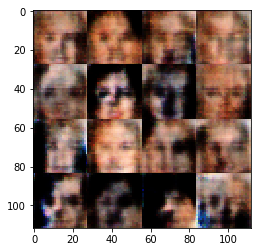

Epoch 1/1... Discriminator Loss: 0.8281... Generator Loss: 1.5985
Epoch 1/1... Discriminator Loss: 1.1799... Generator Loss: 1.1323
Epoch 1/1... Discriminator Loss: 1.1726... Generator Loss: 1.0653
Epoch 1/1... Discriminator Loss: 1.0572... Generator Loss: 1.2826


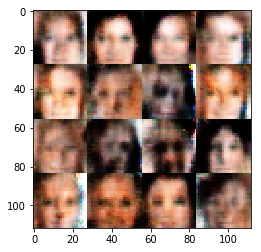

Epoch 1/1... Discriminator Loss: 1.2724... Generator Loss: 1.0394
Epoch 1/1... Discriminator Loss: 0.9691... Generator Loss: 1.3375
Epoch 1/1... Discriminator Loss: 1.0869... Generator Loss: 1.1273
Epoch 1/1... Discriminator Loss: 1.1291... Generator Loss: 1.2755


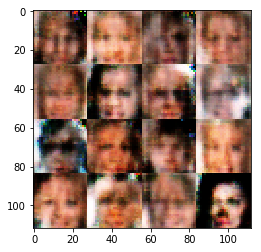

Epoch 1/1... Discriminator Loss: 1.0179... Generator Loss: 1.2286
Epoch 1/1... Discriminator Loss: 0.8552... Generator Loss: 1.8396
Epoch 1/1... Discriminator Loss: 1.1899... Generator Loss: 1.6295
Epoch 1/1... Discriminator Loss: 2.2219... Generator Loss: 0.3187


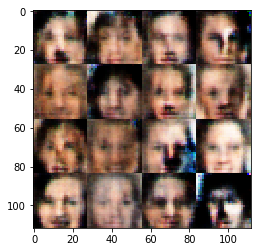

Epoch 1/1... Discriminator Loss: 1.3009... Generator Loss: 0.7739
Epoch 1/1... Discriminator Loss: 0.9810... Generator Loss: 1.4322
Epoch 1/1... Discriminator Loss: 1.2789... Generator Loss: 1.2850
Epoch 1/1... Discriminator Loss: 1.2783... Generator Loss: 1.1532


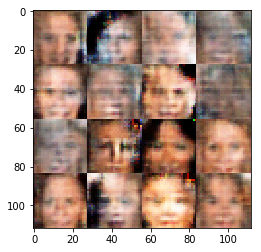

Epoch 1/1... Discriminator Loss: 1.1017... Generator Loss: 1.1827
Epoch 1/1... Discriminator Loss: 1.4640... Generator Loss: 0.6569
Epoch 1/1... Discriminator Loss: 1.1150... Generator Loss: 1.0260
Epoch 1/1... Discriminator Loss: 1.2570... Generator Loss: 0.8633


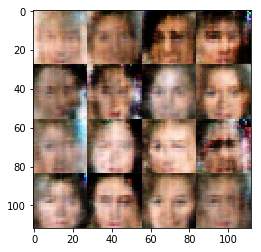

Epoch 1/1... Discriminator Loss: 1.0603... Generator Loss: 1.5566
Epoch 1/1... Discriminator Loss: 1.6838... Generator Loss: 0.5648
Epoch 1/1... Discriminator Loss: 1.5919... Generator Loss: 1.2367
Epoch 1/1... Discriminator Loss: 1.2040... Generator Loss: 1.0276


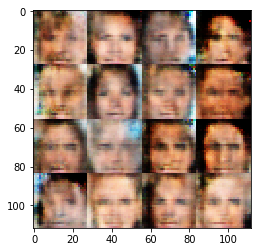

Epoch 1/1... Discriminator Loss: 1.2677... Generator Loss: 0.8976
Epoch 1/1... Discriminator Loss: 1.1158... Generator Loss: 0.8705
Epoch 1/1... Discriminator Loss: 1.0353... Generator Loss: 1.3756
Epoch 1/1... Discriminator Loss: 1.0129... Generator Loss: 1.2207


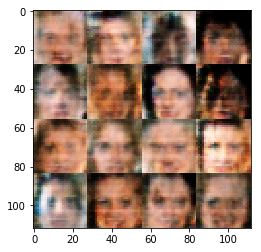

Epoch 1/1... Discriminator Loss: 1.1989... Generator Loss: 0.8280
Epoch 1/1... Discriminator Loss: 1.2369... Generator Loss: 0.8459
Epoch 1/1... Discriminator Loss: 1.2923... Generator Loss: 0.8761
Epoch 1/1... Discriminator Loss: 1.1521... Generator Loss: 0.9474


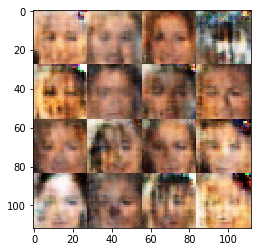

Epoch 1/1... Discriminator Loss: 1.2023... Generator Loss: 1.0299
Epoch 1/1... Discriminator Loss: 1.4173... Generator Loss: 0.7949
Epoch 1/1... Discriminator Loss: 1.3063... Generator Loss: 0.7507
Epoch 1/1... Discriminator Loss: 1.3462... Generator Loss: 1.0880


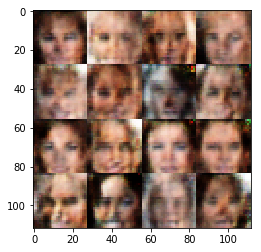

Epoch 1/1... Discriminator Loss: 1.3467... Generator Loss: 1.3257
Epoch 1/1... Discriminator Loss: 1.1385... Generator Loss: 0.8732
Epoch 1/1... Discriminator Loss: 1.5198... Generator Loss: 0.8404
Epoch 1/1... Discriminator Loss: 1.4422... Generator Loss: 0.9947


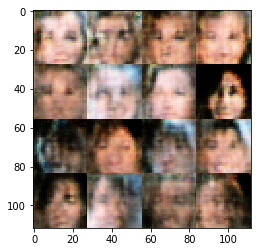

Epoch 1/1... Discriminator Loss: 1.4664... Generator Loss: 0.6811
Epoch 1/1... Discriminator Loss: 1.1754... Generator Loss: 0.9549
Epoch 1/1... Discriminator Loss: 1.2864... Generator Loss: 0.8117
Epoch 1/1... Discriminator Loss: 1.2662... Generator Loss: 0.8656


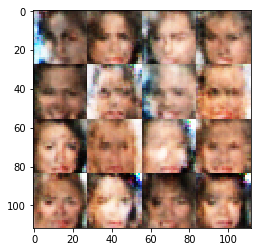

Epoch 1/1... Discriminator Loss: 1.4110... Generator Loss: 1.0940
Epoch 1/1... Discriminator Loss: 1.3326... Generator Loss: 0.9980
Epoch 1/1... Discriminator Loss: 1.2282... Generator Loss: 0.6959
Epoch 1/1... Discriminator Loss: 1.1854... Generator Loss: 1.0500


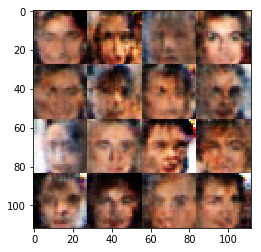

Epoch 1/1... Discriminator Loss: 1.6282... Generator Loss: 1.1381
Epoch 1/1... Discriminator Loss: 1.5565... Generator Loss: 0.7677
Epoch 1/1... Discriminator Loss: 1.3521... Generator Loss: 1.0407
Epoch 1/1... Discriminator Loss: 1.2944... Generator Loss: 0.8213


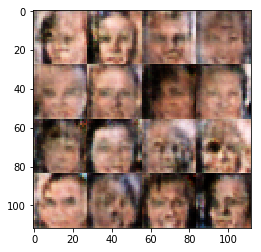

Epoch 1/1... Discriminator Loss: 1.0164... Generator Loss: 0.9821
Epoch 1/1... Discriminator Loss: 1.4710... Generator Loss: 0.8601
Epoch 1/1... Discriminator Loss: 1.2244... Generator Loss: 1.1559
Epoch 1/1... Discriminator Loss: 1.2823... Generator Loss: 1.0956


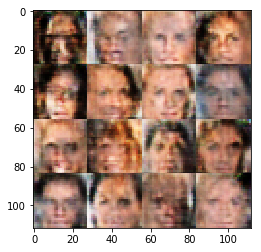

Epoch 1/1... Discriminator Loss: 1.5344... Generator Loss: 0.6541
Epoch 1/1... Discriminator Loss: 1.0589... Generator Loss: 1.2315
Epoch 1/1... Discriminator Loss: 1.2833... Generator Loss: 1.0034
Epoch 1/1... Discriminator Loss: 1.2660... Generator Loss: 1.0244


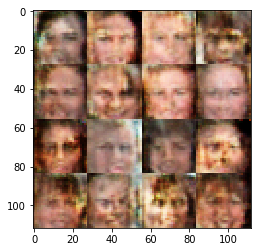

Epoch 1/1... Discriminator Loss: 1.5188... Generator Loss: 0.9616
Epoch 1/1... Discriminator Loss: 1.5301... Generator Loss: 0.6552
Epoch 1/1... Discriminator Loss: 1.0620... Generator Loss: 1.0982
Epoch 1/1... Discriminator Loss: 1.2646... Generator Loss: 0.9403


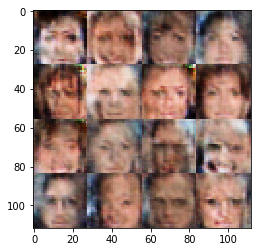

Epoch 1/1... Discriminator Loss: 1.2526... Generator Loss: 1.1792
Epoch 1/1... Discriminator Loss: 1.4000... Generator Loss: 0.7441
Epoch 1/1... Discriminator Loss: 1.2736... Generator Loss: 1.0655
Epoch 1/1... Discriminator Loss: 1.3795... Generator Loss: 0.9373


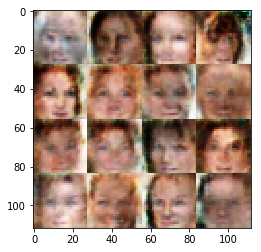

Epoch 1/1... Discriminator Loss: 1.1503... Generator Loss: 0.9468
Epoch 1/1... Discriminator Loss: 1.3333... Generator Loss: 0.8811
Epoch 1/1... Discriminator Loss: 1.4774... Generator Loss: 0.8441
Epoch 1/1... Discriminator Loss: 1.2379... Generator Loss: 0.8245


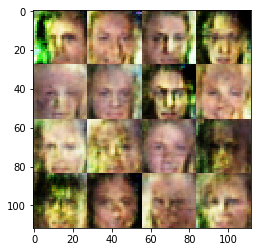

Epoch 1/1... Discriminator Loss: 1.6978... Generator Loss: 0.7575
Epoch 1/1... Discriminator Loss: 1.1975... Generator Loss: 0.8612
Epoch 1/1... Discriminator Loss: 1.3317... Generator Loss: 0.7637
Epoch 1/1... Discriminator Loss: 1.3361... Generator Loss: 0.9580


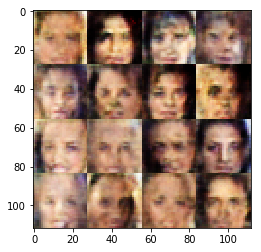

Epoch 1/1... Discriminator Loss: 1.4854... Generator Loss: 0.8843
Epoch 1/1... Discriminator Loss: 1.3603... Generator Loss: 0.7090
Epoch 1/1... Discriminator Loss: 1.2994... Generator Loss: 0.8296
Epoch 1/1... Discriminator Loss: 1.1373... Generator Loss: 0.8860


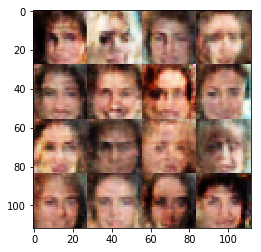

Epoch 1/1... Discriminator Loss: 1.3472... Generator Loss: 0.7636
Epoch 1/1... Discriminator Loss: 1.3398... Generator Loss: 0.8149
Epoch 1/1... Discriminator Loss: 1.1900... Generator Loss: 0.9943
Epoch 1/1... Discriminator Loss: 1.2435... Generator Loss: 1.0257


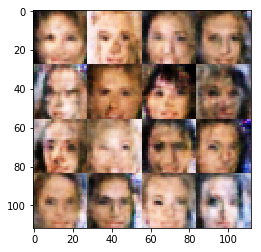

Epoch 1/1... Discriminator Loss: 1.2551... Generator Loss: 0.8391
Epoch 1/1... Discriminator Loss: 1.2253... Generator Loss: 0.8218
Epoch 1/1... Discriminator Loss: 1.2961... Generator Loss: 0.9079
Epoch 1/1... Discriminator Loss: 1.4252... Generator Loss: 0.8607


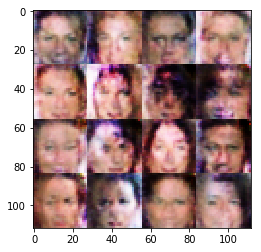

Epoch 1/1... Discriminator Loss: 1.1804... Generator Loss: 1.0630
Epoch 1/1... Discriminator Loss: 1.5876... Generator Loss: 0.7724
Epoch 1/1... Discriminator Loss: 1.4059... Generator Loss: 0.7881
Epoch 1/1... Discriminator Loss: 1.2244... Generator Loss: 0.9483


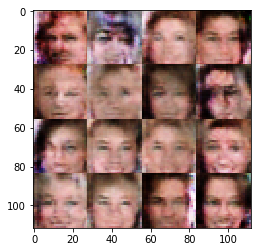

Epoch 1/1... Discriminator Loss: 1.2452... Generator Loss: 0.7979
Epoch 1/1... Discriminator Loss: 1.3403... Generator Loss: 0.9777
Epoch 1/1... Discriminator Loss: 1.4293... Generator Loss: 0.7935
Epoch 1/1... Discriminator Loss: 1.1715... Generator Loss: 1.1539


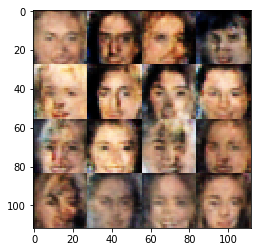

Epoch 1/1... Discriminator Loss: 1.2525... Generator Loss: 0.8451
Epoch 1/1... Discriminator Loss: 1.3048... Generator Loss: 0.9147
Epoch 1/1... Discriminator Loss: 1.2046... Generator Loss: 0.9815
Epoch 1/1... Discriminator Loss: 1.3883... Generator Loss: 0.8117


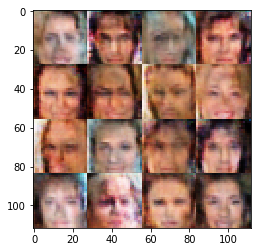

Epoch 1/1... Discriminator Loss: 1.2637... Generator Loss: 0.9474
Epoch 1/1... Discriminator Loss: 1.3276... Generator Loss: 0.9986
Epoch 1/1... Discriminator Loss: 1.2474... Generator Loss: 0.8542
Epoch 1/1... Discriminator Loss: 1.4305... Generator Loss: 0.6264


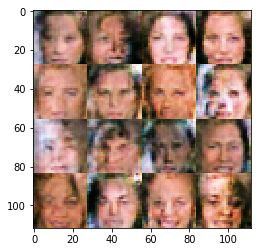

Epoch 1/1... Discriminator Loss: 1.2758... Generator Loss: 1.0630
Epoch 1/1... Discriminator Loss: 1.3112... Generator Loss: 0.8268
Epoch 1/1... Discriminator Loss: 1.4629... Generator Loss: 0.7509
Epoch 1/1... Discriminator Loss: 1.3309... Generator Loss: 0.9960


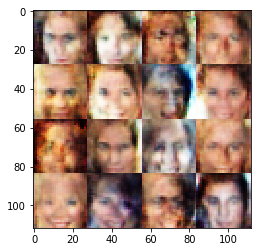

Epoch 1/1... Discriminator Loss: 1.2722... Generator Loss: 0.9302
Epoch 1/1... Discriminator Loss: 1.3110... Generator Loss: 0.8746
Epoch 1/1... Discriminator Loss: 1.4411... Generator Loss: 0.8410
Epoch 1/1... Discriminator Loss: 1.3571... Generator Loss: 0.9165


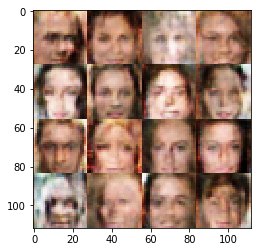

Epoch 1/1... Discriminator Loss: 1.3379... Generator Loss: 0.8796
Epoch 1/1... Discriminator Loss: 1.2605... Generator Loss: 0.9969
Epoch 1/1... Discriminator Loss: 1.3921... Generator Loss: 0.8491
Epoch 1/1... Discriminator Loss: 1.2764... Generator Loss: 0.9624


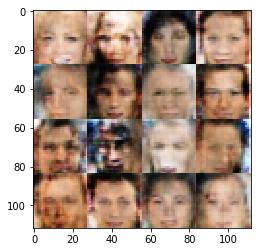

Epoch 1/1... Discriminator Loss: 1.2653... Generator Loss: 0.7298
Epoch 1/1... Discriminator Loss: 1.3285... Generator Loss: 0.8554
Epoch 1/1... Discriminator Loss: 1.4406... Generator Loss: 0.7607
Epoch 1/1... Discriminator Loss: 1.2659... Generator Loss: 0.9982


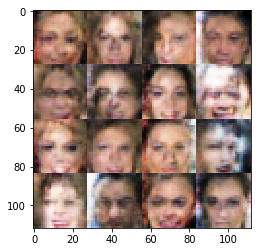

Epoch 1/1... Discriminator Loss: 1.1806... Generator Loss: 0.9018
Epoch 1/1... Discriminator Loss: 1.2443... Generator Loss: 0.8731
Epoch 1/1... Discriminator Loss: 1.3558... Generator Loss: 0.9205
Epoch 1/1... Discriminator Loss: 1.2819... Generator Loss: 0.8854


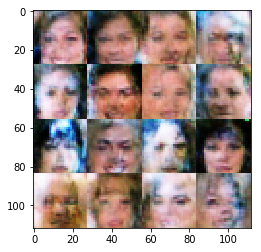

Epoch 1/1... Discriminator Loss: 1.3708... Generator Loss: 0.7414
Epoch 1/1... Discriminator Loss: 1.2989... Generator Loss: 0.8963
Epoch 1/1... Discriminator Loss: 1.1760... Generator Loss: 0.9279
Epoch 1/1... Discriminator Loss: 1.2655... Generator Loss: 0.9314


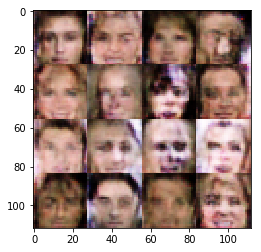

Epoch 1/1... Discriminator Loss: 1.4279... Generator Loss: 0.8164
Epoch 1/1... Discriminator Loss: 1.4240... Generator Loss: 0.6789
Epoch 1/1... Discriminator Loss: 1.2416... Generator Loss: 0.8500
Epoch 1/1... Discriminator Loss: 1.1546... Generator Loss: 0.8839


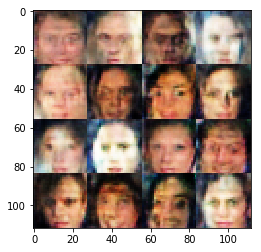

Epoch 1/1... Discriminator Loss: 1.4039... Generator Loss: 0.7673
Epoch 1/1... Discriminator Loss: 1.3615... Generator Loss: 0.6932
Epoch 1/1... Discriminator Loss: 1.2866... Generator Loss: 0.8877
Epoch 1/1... Discriminator Loss: 1.2284... Generator Loss: 0.7567


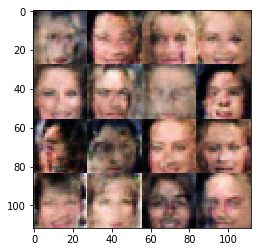

Epoch 1/1... Discriminator Loss: 1.2544... Generator Loss: 0.8516
Epoch 1/1... Discriminator Loss: 1.3647... Generator Loss: 0.7626
Epoch 1/1... Discriminator Loss: 1.2505... Generator Loss: 0.8542
Epoch 1/1... Discriminator Loss: 1.4034... Generator Loss: 0.7887


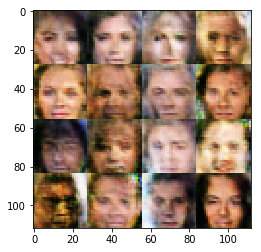

Epoch 1/1... Discriminator Loss: 1.2545... Generator Loss: 1.0395
Epoch 1/1... Discriminator Loss: 1.1555... Generator Loss: 0.9950
Epoch 1/1... Discriminator Loss: 1.3801... Generator Loss: 0.8476
Epoch 1/1... Discriminator Loss: 1.3228... Generator Loss: 0.9207


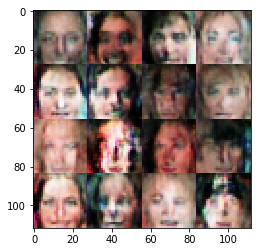

Epoch 1/1... Discriminator Loss: 1.3819... Generator Loss: 0.9142
Epoch 1/1... Discriminator Loss: 1.2701... Generator Loss: 0.6811
Epoch 1/1... Discriminator Loss: 1.2275... Generator Loss: 0.7725
Epoch 1/1... Discriminator Loss: 1.2172... Generator Loss: 0.8196


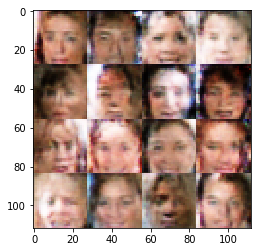

Epoch 1/1... Discriminator Loss: 1.2487... Generator Loss: 1.0388
Epoch 1/1... Discriminator Loss: 1.2104... Generator Loss: 0.8947
Epoch 1/1... Discriminator Loss: 1.3114... Generator Loss: 0.9820
Epoch 1/1... Discriminator Loss: 1.3868... Generator Loss: 0.7703


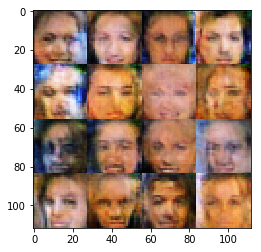

Epoch 1/1... Discriminator Loss: 1.2654... Generator Loss: 0.9365
Epoch 1/1... Discriminator Loss: 1.3621... Generator Loss: 0.8351
Epoch 1/1... Discriminator Loss: 1.4491... Generator Loss: 0.7629
Epoch 1/1... Discriminator Loss: 1.2673... Generator Loss: 0.7552


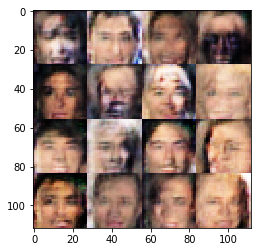

Epoch 1/1... Discriminator Loss: 1.0993... Generator Loss: 1.1215
Epoch 1/1... Discriminator Loss: 1.2945... Generator Loss: 0.8715
Epoch 1/1... Discriminator Loss: 1.3238... Generator Loss: 0.6694
Epoch 1/1... Discriminator Loss: 1.4568... Generator Loss: 0.7351


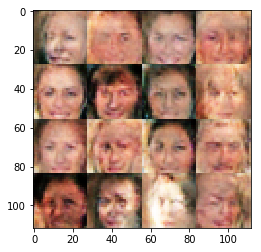

Epoch 1/1... Discriminator Loss: 1.1933... Generator Loss: 0.8757
Epoch 1/1... Discriminator Loss: 1.6028... Generator Loss: 0.6536
Epoch 1/1... Discriminator Loss: 1.3476... Generator Loss: 0.7331
Epoch 1/1... Discriminator Loss: 1.3221... Generator Loss: 0.9446


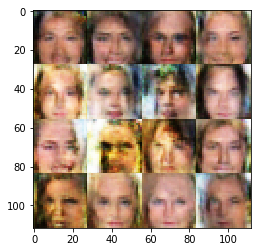

Epoch 1/1... Discriminator Loss: 1.3052... Generator Loss: 0.8987
Epoch 1/1... Discriminator Loss: 1.4868... Generator Loss: 0.5948
Epoch 1/1... Discriminator Loss: 1.2928... Generator Loss: 0.8051
Epoch 1/1... Discriminator Loss: 1.2764... Generator Loss: 0.9599


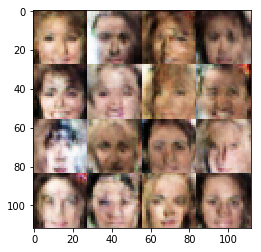

Epoch 1/1... Discriminator Loss: 1.2365... Generator Loss: 0.9943
Epoch 1/1... Discriminator Loss: 1.3700... Generator Loss: 0.8618
Epoch 1/1... Discriminator Loss: 1.2319... Generator Loss: 0.8585
Epoch 1/1... Discriminator Loss: 1.3258... Generator Loss: 0.8567


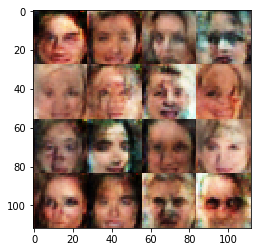

Epoch 1/1... Discriminator Loss: 1.2428... Generator Loss: 0.8187
Epoch 1/1... Discriminator Loss: 1.2993... Generator Loss: 0.8979
Epoch 1/1... Discriminator Loss: 1.2359... Generator Loss: 0.8734
Epoch 1/1... Discriminator Loss: 1.3742... Generator Loss: 0.9641


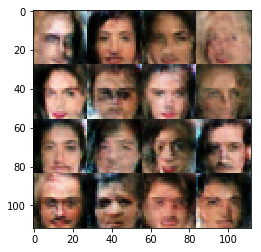

Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.8318
Epoch 1/1... Discriminator Loss: 1.3167... Generator Loss: 0.8478
Epoch 1/1... Discriminator Loss: 1.4031... Generator Loss: 0.7161
Epoch 1/1... Discriminator Loss: 1.2360... Generator Loss: 0.9768


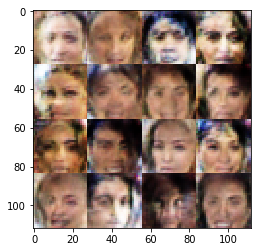

Epoch 1/1... Discriminator Loss: 1.2701... Generator Loss: 0.8159
Epoch 1/1... Discriminator Loss: 1.3278... Generator Loss: 0.8426
Epoch 1/1... Discriminator Loss: 1.2191... Generator Loss: 0.7785
Epoch 1/1... Discriminator Loss: 1.1884... Generator Loss: 0.8678


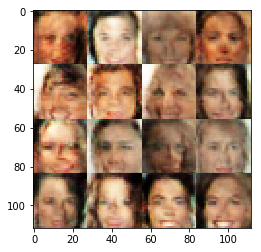

Epoch 1/1... Discriminator Loss: 1.3264... Generator Loss: 0.8777
Epoch 1/1... Discriminator Loss: 1.2849... Generator Loss: 0.7987
Epoch 1/1... Discriminator Loss: 1.4134... Generator Loss: 0.8521
Epoch 1/1... Discriminator Loss: 1.4313... Generator Loss: 0.7861


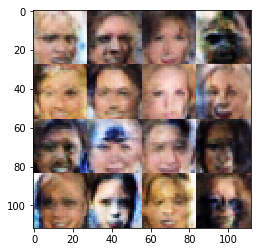

Epoch 1/1... Discriminator Loss: 1.3385... Generator Loss: 0.7582
Epoch 1/1... Discriminator Loss: 1.1645... Generator Loss: 0.9067
Epoch 1/1... Discriminator Loss: 1.2851... Generator Loss: 0.8379
Epoch 1/1... Discriminator Loss: 1.3425... Generator Loss: 0.7344


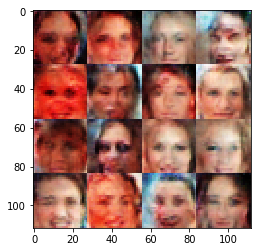

Epoch 1/1... Discriminator Loss: 1.3601... Generator Loss: 0.7136
Epoch 1/1... Discriminator Loss: 1.3072... Generator Loss: 0.7189
Epoch 1/1... Discriminator Loss: 1.3323... Generator Loss: 1.0534
Epoch 1/1... Discriminator Loss: 1.3374... Generator Loss: 0.6992


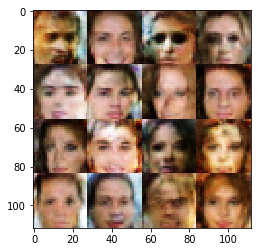

Epoch 1/1... Discriminator Loss: 1.3089... Generator Loss: 0.9533
Epoch 1/1... Discriminator Loss: 1.2527... Generator Loss: 1.0182
Epoch 1/1... Discriminator Loss: 1.3379... Generator Loss: 0.7980
Epoch 1/1... Discriminator Loss: 1.3118... Generator Loss: 0.8403


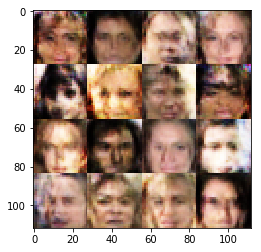

Epoch 1/1... Discriminator Loss: 1.4011... Generator Loss: 0.8459
Epoch 1/1... Discriminator Loss: 1.3970... Generator Loss: 0.7156
Epoch 1/1... Discriminator Loss: 1.3198... Generator Loss: 0.7404
Epoch 1/1... Discriminator Loss: 1.4183... Generator Loss: 0.8650


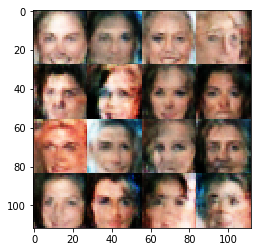

Epoch 1/1... Discriminator Loss: 1.2168... Generator Loss: 0.8925
Epoch 1/1... Discriminator Loss: 1.4818... Generator Loss: 0.7060
Epoch 1/1... Discriminator Loss: 1.3807... Generator Loss: 0.7928
Epoch 1/1... Discriminator Loss: 1.3416... Generator Loss: 0.7569


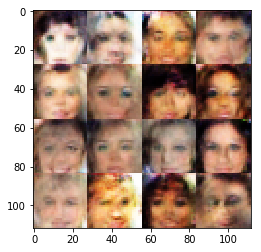

Epoch 1/1... Discriminator Loss: 1.4315... Generator Loss: 0.7569
Epoch 1/1... Discriminator Loss: 1.3707... Generator Loss: 0.7778
Epoch 1/1... Discriminator Loss: 1.3789... Generator Loss: 0.8243
Epoch 1/1... Discriminator Loss: 1.2523... Generator Loss: 0.8579


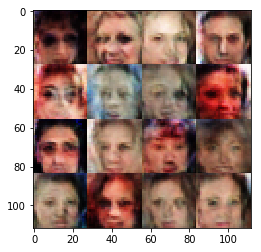

Epoch 1/1... Discriminator Loss: 1.2922... Generator Loss: 0.8296
Epoch 1/1... Discriminator Loss: 1.3523... Generator Loss: 0.9075
Epoch 1/1... Discriminator Loss: 1.3741... Generator Loss: 0.9200
Epoch 1/1... Discriminator Loss: 1.3739... Generator Loss: 0.7415


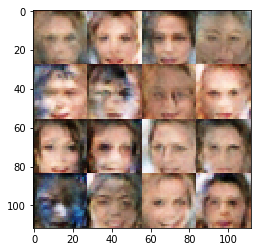

Epoch 1/1... Discriminator Loss: 1.4064... Generator Loss: 0.8152
Epoch 1/1... Discriminator Loss: 1.3866... Generator Loss: 0.8549
Epoch 1/1... Discriminator Loss: 1.2473... Generator Loss: 0.8688
Epoch 1/1... Discriminator Loss: 1.2584... Generator Loss: 0.8695


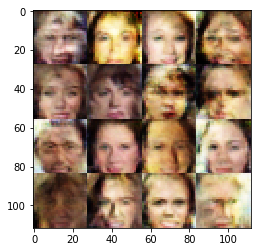

Epoch 1/1... Discriminator Loss: 1.3216... Generator Loss: 0.7748
Epoch 1/1... Discriminator Loss: 1.3351... Generator Loss: 0.7380
Epoch 1/1... Discriminator Loss: 1.2423... Generator Loss: 0.8412
Epoch 1/1... Discriminator Loss: 1.1790... Generator Loss: 0.9260


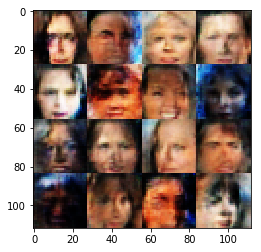

Epoch 1/1... Discriminator Loss: 1.2342... Generator Loss: 0.9106
Epoch 1/1... Discriminator Loss: 1.1833... Generator Loss: 0.8688
Epoch 1/1... Discriminator Loss: 1.3805... Generator Loss: 0.8538
Epoch 1/1... Discriminator Loss: 1.3237... Generator Loss: 0.7365


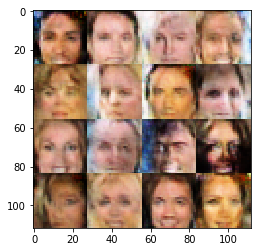

Epoch 1/1... Discriminator Loss: 1.2715... Generator Loss: 0.8838
Epoch 1/1... Discriminator Loss: 1.3490... Generator Loss: 0.8419
Epoch 1/1... Discriminator Loss: 1.1583... Generator Loss: 0.8968
Epoch 1/1... Discriminator Loss: 1.2528... Generator Loss: 0.7486


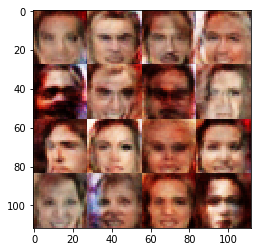

Epoch 1/1... Discriminator Loss: 1.5120... Generator Loss: 0.7106
Epoch 1/1... Discriminator Loss: 1.2770... Generator Loss: 0.9271
Epoch 1/1... Discriminator Loss: 1.4246... Generator Loss: 0.9168
Epoch 1/1... Discriminator Loss: 1.3302... Generator Loss: 0.9239


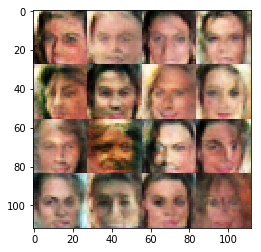

Epoch 1/1... Discriminator Loss: 1.3651... Generator Loss: 0.7861
Epoch 1/1... Discriminator Loss: 1.2674... Generator Loss: 0.8594
Epoch 1/1... Discriminator Loss: 1.3294... Generator Loss: 0.8491
Epoch 1/1... Discriminator Loss: 1.1891... Generator Loss: 0.8842


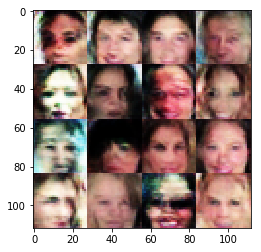

Epoch 1/1... Discriminator Loss: 1.1925... Generator Loss: 0.8753
Epoch 1/1... Discriminator Loss: 1.2028... Generator Loss: 0.8846
Epoch 1/1... Discriminator Loss: 1.2814... Generator Loss: 0.8818
Epoch 1/1... Discriminator Loss: 1.2974... Generator Loss: 0.7826


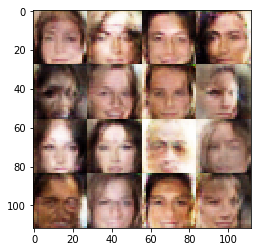

Epoch 1/1... Discriminator Loss: 1.2147... Generator Loss: 0.8919
Epoch 1/1... Discriminator Loss: 1.3494... Generator Loss: 0.8194
Epoch 1/1... Discriminator Loss: 1.3918... Generator Loss: 0.7473
Epoch 1/1... Discriminator Loss: 1.3595... Generator Loss: 0.8092


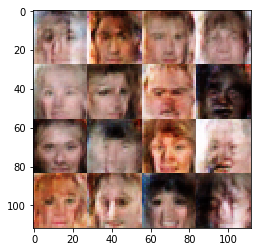

Epoch 1/1... Discriminator Loss: 1.5034... Generator Loss: 0.8370
Epoch 1/1... Discriminator Loss: 1.3148... Generator Loss: 0.8946
Epoch 1/1... Discriminator Loss: 1.3492... Generator Loss: 0.7119
Epoch 1/1... Discriminator Loss: 1.3761... Generator Loss: 0.8753


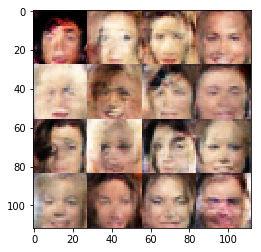

Epoch 1/1... Discriminator Loss: 1.3003... Generator Loss: 0.8392
Epoch 1/1... Discriminator Loss: 1.2914... Generator Loss: 0.8217
Epoch 1/1... Discriminator Loss: 1.3193... Generator Loss: 0.8281
Epoch 1/1... Discriminator Loss: 1.3424... Generator Loss: 0.8050


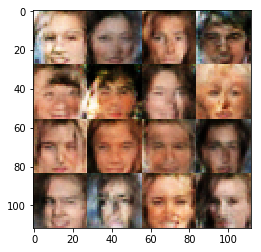

Epoch 1/1... Discriminator Loss: 1.3223... Generator Loss: 0.8033
Epoch 1/1... Discriminator Loss: 1.1928... Generator Loss: 0.9397
Epoch 1/1... Discriminator Loss: 1.3612... Generator Loss: 0.7376
Epoch 1/1... Discriminator Loss: 1.3529... Generator Loss: 0.8502


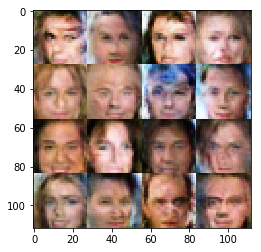

Epoch 1/1... Discriminator Loss: 1.3439... Generator Loss: 0.8046
Epoch 1/1... Discriminator Loss: 1.2842... Generator Loss: 1.0291
Epoch 1/1... Discriminator Loss: 1.2586... Generator Loss: 0.8466
Epoch 1/1... Discriminator Loss: 1.3516... Generator Loss: 0.8192


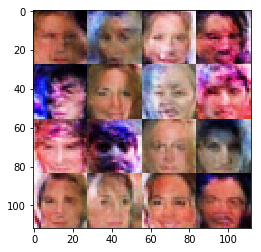

Epoch 1/1... Discriminator Loss: 1.3053... Generator Loss: 0.8903
Epoch 1/1... Discriminator Loss: 1.2250... Generator Loss: 0.9381
Epoch 1/1... Discriminator Loss: 1.2837... Generator Loss: 0.9059
Epoch 1/1... Discriminator Loss: 1.2326... Generator Loss: 0.9064


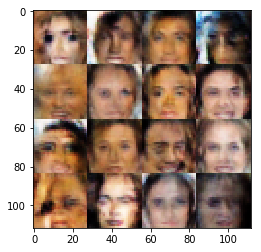

Epoch 1/1... Discriminator Loss: 1.3532... Generator Loss: 0.7469
Epoch 1/1... Discriminator Loss: 1.3210... Generator Loss: 0.8353
Epoch 1/1... Discriminator Loss: 1.3869... Generator Loss: 0.7530
Epoch 1/1... Discriminator Loss: 1.2888... Generator Loss: 0.8501


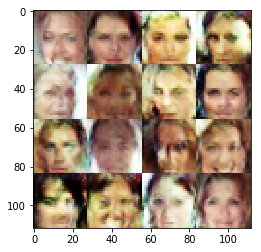

Epoch 1/1... Discriminator Loss: 1.3138... Generator Loss: 0.7294
Epoch 1/1... Discriminator Loss: 1.2678... Generator Loss: 0.8827
Epoch 1/1... Discriminator Loss: 1.2859... Generator Loss: 0.9284
Epoch 1/1... Discriminator Loss: 1.1818... Generator Loss: 0.9161


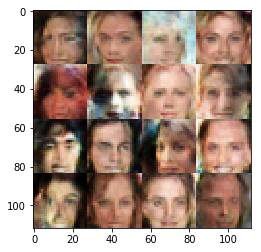

Epoch 1/1... Discriminator Loss: 1.2270... Generator Loss: 0.9642
Epoch 1/1... Discriminator Loss: 1.4148... Generator Loss: 0.7667
Epoch 1/1... Discriminator Loss: 1.1589... Generator Loss: 1.0720
Epoch 1/1... Discriminator Loss: 1.2267... Generator Loss: 0.8978


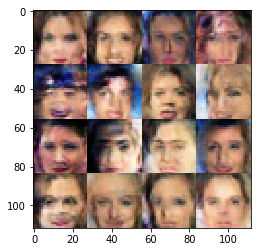

Epoch 1/1... Discriminator Loss: 1.2861... Generator Loss: 0.9369
Epoch 1/1... Discriminator Loss: 1.4252... Generator Loss: 0.7408
Epoch 1/1... Discriminator Loss: 1.4603... Generator Loss: 0.7078
Epoch 1/1... Discriminator Loss: 1.2641... Generator Loss: 0.8554


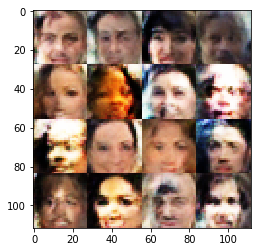

Epoch 1/1... Discriminator Loss: 1.4575... Generator Loss: 0.6839
Epoch 1/1... Discriminator Loss: 1.2788... Generator Loss: 0.8537
Epoch 1/1... Discriminator Loss: 1.3688... Generator Loss: 0.7470
Epoch 1/1... Discriminator Loss: 1.3626... Generator Loss: 0.7264


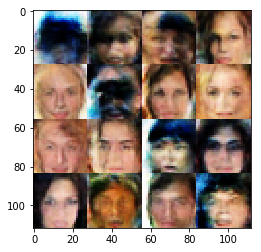

Epoch 1/1... Discriminator Loss: 1.2743... Generator Loss: 0.8544
Epoch 1/1... Discriminator Loss: 1.5237... Generator Loss: 0.6652
Epoch 1/1... Discriminator Loss: 1.3631... Generator Loss: 0.7610
Epoch 1/1... Discriminator Loss: 1.3389... Generator Loss: 0.8837


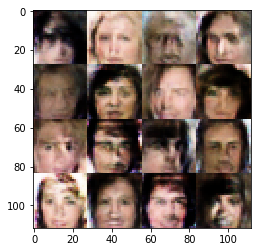

Epoch 1/1... Discriminator Loss: 1.2257... Generator Loss: 0.8112
Epoch 1/1... Discriminator Loss: 1.2390... Generator Loss: 0.7218
Epoch 1/1... Discriminator Loss: 1.4571... Generator Loss: 0.7005
Epoch 1/1... Discriminator Loss: 1.3416... Generator Loss: 0.7363


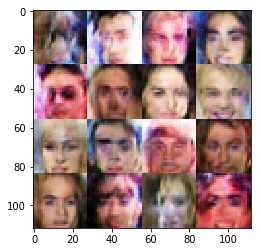

Epoch 1/1... Discriminator Loss: 1.2850... Generator Loss: 0.6962
Epoch 1/1... Discriminator Loss: 1.4400... Generator Loss: 0.7194
Epoch 1/1... Discriminator Loss: 1.2990... Generator Loss: 0.8658
Epoch 1/1... Discriminator Loss: 1.2463... Generator Loss: 0.8626


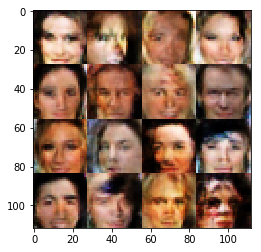

Epoch 1/1... Discriminator Loss: 1.2612... Generator Loss: 0.8818
Epoch 1/1... Discriminator Loss: 1.3218... Generator Loss: 0.8923
Epoch 1/1... Discriminator Loss: 1.3415... Generator Loss: 0.8468
Epoch 1/1... Discriminator Loss: 1.3072... Generator Loss: 0.7822


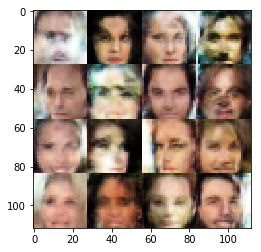

Epoch 1/1... Discriminator Loss: 1.2489... Generator Loss: 0.8453
Epoch 1/1... Discriminator Loss: 1.2233... Generator Loss: 0.9595
Epoch 1/1... Discriminator Loss: 1.4212... Generator Loss: 0.5918
Epoch 1/1... Discriminator Loss: 1.3947... Generator Loss: 0.8288


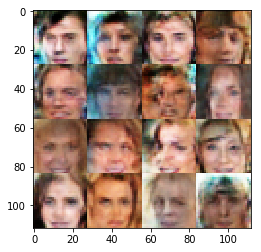

Epoch 1/1... Discriminator Loss: 1.3444... Generator Loss: 0.7960
Epoch 1/1... Discriminator Loss: 1.2468... Generator Loss: 0.8349
Epoch 1/1... Discriminator Loss: 1.2743... Generator Loss: 0.8962
Epoch 1/1... Discriminator Loss: 1.3449... Generator Loss: 0.6952


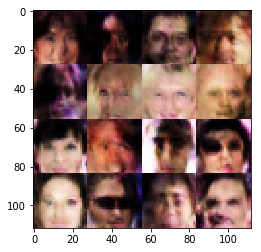

Epoch 1/1... Discriminator Loss: 1.1642... Generator Loss: 0.9182
Epoch 1/1... Discriminator Loss: 1.2320... Generator Loss: 1.0115
Epoch 1/1... Discriminator Loss: 1.4015... Generator Loss: 0.6953
Epoch 1/1... Discriminator Loss: 1.2804... Generator Loss: 0.8388


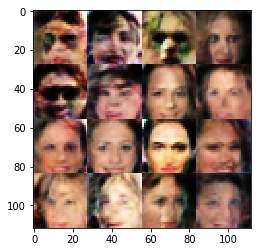

Epoch 1/1... Discriminator Loss: 1.2382... Generator Loss: 0.8932
Epoch 1/1... Discriminator Loss: 1.3900... Generator Loss: 0.9158
Epoch 1/1... Discriminator Loss: 1.2921... Generator Loss: 0.8387
Epoch 1/1... Discriminator Loss: 1.3158... Generator Loss: 0.8749


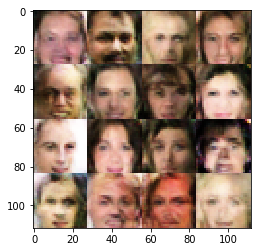

Epoch 1/1... Discriminator Loss: 1.2928... Generator Loss: 0.9389
Epoch 1/1... Discriminator Loss: 1.0852... Generator Loss: 0.9587
Epoch 1/1... Discriminator Loss: 1.2231... Generator Loss: 0.8429
Epoch 1/1... Discriminator Loss: 1.3498... Generator Loss: 0.7759


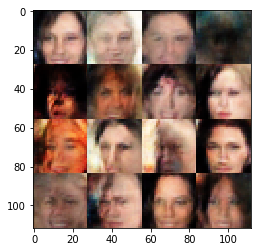

Epoch 1/1... Discriminator Loss: 1.3334... Generator Loss: 0.7483
Epoch 1/1... Discriminator Loss: 1.4662... Generator Loss: 0.7659
Epoch 1/1... Discriminator Loss: 1.5202... Generator Loss: 0.6097
Epoch 1/1... Discriminator Loss: 1.3304... Generator Loss: 0.8389


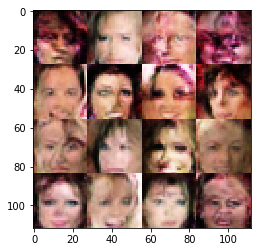

Epoch 1/1... Discriminator Loss: 1.3731... Generator Loss: 0.7732
Epoch 1/1... Discriminator Loss: 1.2292... Generator Loss: 0.8534
Epoch 1/1... Discriminator Loss: 1.3310... Generator Loss: 0.9870
Epoch 1/1... Discriminator Loss: 1.2499... Generator Loss: 0.9564


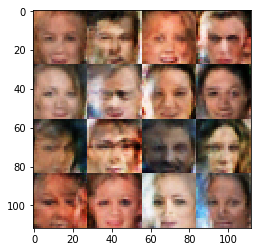

Epoch 1/1... Discriminator Loss: 1.5006... Generator Loss: 0.5734
Epoch 1/1... Discriminator Loss: 1.3170... Generator Loss: 0.8118
Epoch 1/1... Discriminator Loss: 1.2935... Generator Loss: 0.8351
Epoch 1/1... Discriminator Loss: 1.3120... Generator Loss: 0.8174


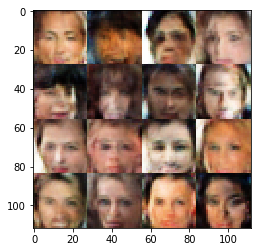

Epoch 1/1... Discriminator Loss: 1.2266... Generator Loss: 0.8077
Epoch 1/1... Discriminator Loss: 1.4271... Generator Loss: 0.8013
Epoch 1/1... Discriminator Loss: 1.4277... Generator Loss: 0.7027
Epoch 1/1... Discriminator Loss: 1.4045... Generator Loss: 0.8571


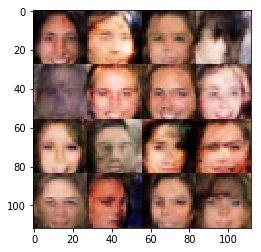

Epoch 1/1... Discriminator Loss: 1.4132... Generator Loss: 0.6321
Epoch 1/1... Discriminator Loss: 1.3622... Generator Loss: 0.8073
Epoch 1/1... Discriminator Loss: 1.5297... Generator Loss: 0.6356
Epoch 1/1... Discriminator Loss: 1.3307... Generator Loss: 0.8729


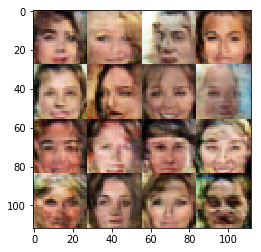

Epoch 1/1... Discriminator Loss: 1.3305... Generator Loss: 0.7341
Epoch 1/1... Discriminator Loss: 1.2898... Generator Loss: 0.8694
Epoch 1/1... Discriminator Loss: 1.3623... Generator Loss: 0.8904
Epoch 1/1... Discriminator Loss: 1.2287... Generator Loss: 0.8518


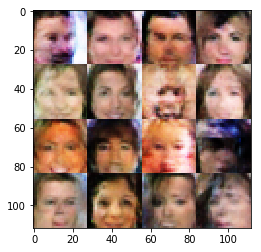

Epoch 1/1... Discriminator Loss: 1.3025... Generator Loss: 0.8023
Epoch 1/1... Discriminator Loss: 1.2719... Generator Loss: 0.7998
Epoch 1/1... Discriminator Loss: 1.3476... Generator Loss: 0.7944
Epoch 1/1... Discriminator Loss: 1.3885... Generator Loss: 0.6363


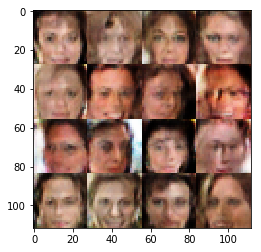

Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.7152
Epoch 1/1... Discriminator Loss: 1.3394... Generator Loss: 0.8891
Epoch 1/1... Discriminator Loss: 1.2358... Generator Loss: 0.9787
Epoch 1/1... Discriminator Loss: 1.2581... Generator Loss: 0.7523


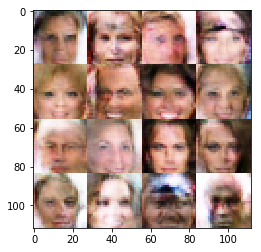

Epoch 1/1... Discriminator Loss: 1.2348... Generator Loss: 0.7887
Epoch 1/1... Discriminator Loss: 1.4376... Generator Loss: 0.7814
Epoch 1/1... Discriminator Loss: 1.2466... Generator Loss: 0.8182
Epoch 1/1... Discriminator Loss: 1.3595... Generator Loss: 0.7712


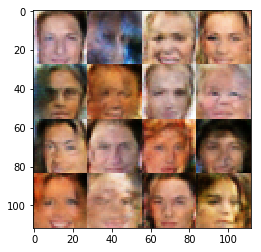

Epoch 1/1... Discriminator Loss: 1.2644... Generator Loss: 0.8441
Epoch 1/1... Discriminator Loss: 1.2288... Generator Loss: 0.9264
Epoch 1/1... Discriminator Loss: 1.3554... Generator Loss: 0.8042
Epoch 1/1... Discriminator Loss: 1.2748... Generator Loss: 0.7664


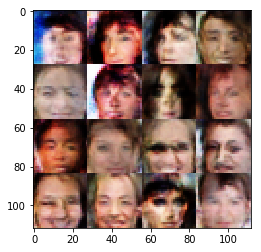

Epoch 1/1... Discriminator Loss: 1.4557... Generator Loss: 0.7790
Epoch 1/1... Discriminator Loss: 1.3748... Generator Loss: 0.9369
Epoch 1/1... Discriminator Loss: 1.2398... Generator Loss: 0.7718
Epoch 1/1... Discriminator Loss: 1.3729... Generator Loss: 0.7360


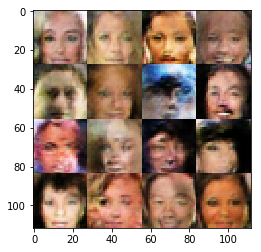

Epoch 1/1... Discriminator Loss: 1.1684... Generator Loss: 0.8367
Epoch 1/1... Discriminator Loss: 1.3562... Generator Loss: 0.7671
Epoch 1/1... Discriminator Loss: 1.4447... Generator Loss: 0.8266
Epoch 1/1... Discriminator Loss: 1.2529... Generator Loss: 0.8425


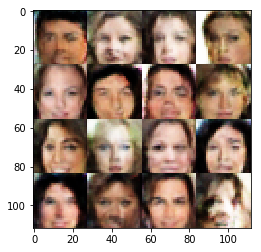

Epoch 1/1... Discriminator Loss: 1.3672... Generator Loss: 0.7226
Epoch 1/1... Discriminator Loss: 1.4584... Generator Loss: 0.6978
Epoch 1/1... Discriminator Loss: 1.3491... Generator Loss: 0.6861
Epoch 1/1... Discriminator Loss: 1.2806... Generator Loss: 0.8599


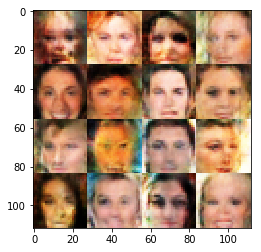

Epoch 1/1... Discriminator Loss: 1.2143... Generator Loss: 0.8526
Epoch 1/1... Discriminator Loss: 1.4504... Generator Loss: 0.6468
Epoch 1/1... Discriminator Loss: 1.3802... Generator Loss: 0.8436
Epoch 1/1... Discriminator Loss: 1.3007... Generator Loss: 0.6978


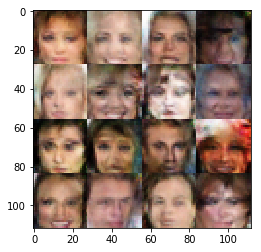

Epoch 1/1... Discriminator Loss: 1.1681... Generator Loss: 0.9050
Epoch 1/1... Discriminator Loss: 1.2513... Generator Loss: 0.7876
Epoch 1/1... Discriminator Loss: 1.4006... Generator Loss: 0.8875
Epoch 1/1... Discriminator Loss: 1.3719... Generator Loss: 0.7978


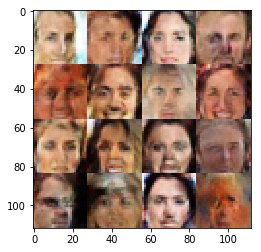

Epoch 1/1... Discriminator Loss: 1.3769... Generator Loss: 0.7249
Epoch 1/1... Discriminator Loss: 1.1660... Generator Loss: 0.8736
Epoch 1/1... Discriminator Loss: 1.3482... Generator Loss: 0.8650
Epoch 1/1... Discriminator Loss: 1.1596... Generator Loss: 0.9463


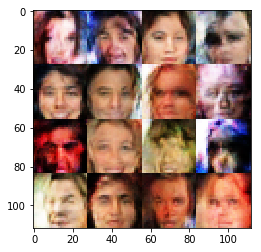

Epoch 1/1... Discriminator Loss: 1.4654... Generator Loss: 0.7301
Epoch 1/1... Discriminator Loss: 1.4197... Generator Loss: 0.6675
Epoch 1/1... Discriminator Loss: 1.3579... Generator Loss: 0.8194
Epoch 1/1... Discriminator Loss: 1.5114... Generator Loss: 0.7163


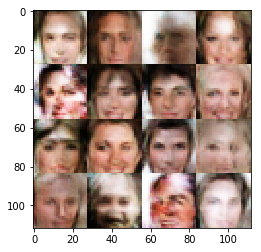

Epoch 1/1... Discriminator Loss: 1.2769... Generator Loss: 0.8084
Epoch 1/1... Discriminator Loss: 1.4121... Generator Loss: 0.7938
Epoch 1/1... Discriminator Loss: 1.2435... Generator Loss: 0.8560
Epoch 1/1... Discriminator Loss: 1.2561... Generator Loss: 0.7822


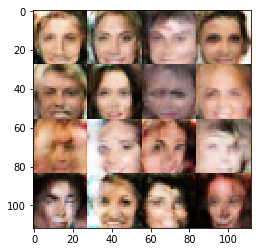

Epoch 1/1... Discriminator Loss: 1.2818... Generator Loss: 0.7472
Epoch 1/1... Discriminator Loss: 1.3667... Generator Loss: 0.7390
Epoch 1/1... Discriminator Loss: 1.3933... Generator Loss: 0.7742
Epoch 1/1... Discriminator Loss: 1.3337... Generator Loss: 0.7427


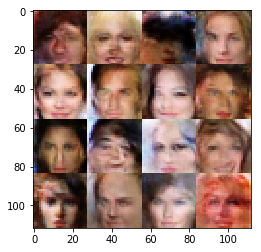

Epoch 1/1... Discriminator Loss: 1.3268... Generator Loss: 0.8217
Epoch 1/1... Discriminator Loss: 1.5194... Generator Loss: 0.6241
Epoch 1/1... Discriminator Loss: 1.3262... Generator Loss: 0.9479
Epoch 1/1... Discriminator Loss: 1.4175... Generator Loss: 0.8205


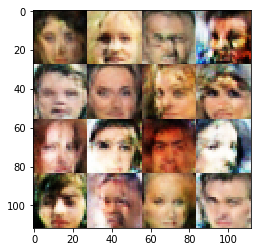

Epoch 1/1... Discriminator Loss: 1.3138... Generator Loss: 0.8183
Epoch 1/1... Discriminator Loss: 1.2549... Generator Loss: 0.8055
Epoch 1/1... Discriminator Loss: 1.3646... Generator Loss: 0.7855
Epoch 1/1... Discriminator Loss: 1.3998... Generator Loss: 0.8347


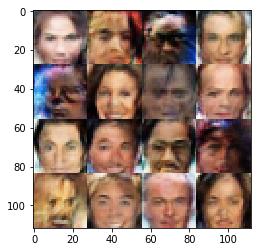

Epoch 1/1... Discriminator Loss: 1.3225... Generator Loss: 0.7024
Epoch 1/1... Discriminator Loss: 1.4472... Generator Loss: 0.6488
Epoch 1/1... Discriminator Loss: 1.3812... Generator Loss: 0.7665
Epoch 1/1... Discriminator Loss: 1.3512... Generator Loss: 0.6852


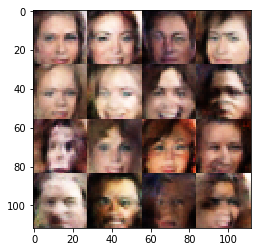

Epoch 1/1... Discriminator Loss: 1.3268... Generator Loss: 0.7432
Epoch 1/1... Discriminator Loss: 1.4114... Generator Loss: 0.8173
Epoch 1/1... Discriminator Loss: 1.3572... Generator Loss: 0.6798
Epoch 1/1... Discriminator Loss: 1.1811... Generator Loss: 0.8731


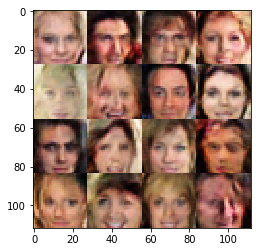

Epoch 1/1... Discriminator Loss: 1.3467... Generator Loss: 0.6981
Epoch 1/1... Discriminator Loss: 1.3390... Generator Loss: 0.7434
Epoch 1/1... Discriminator Loss: 1.5751... Generator Loss: 0.6036


KeyboardInterrupt: 

In [34]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

print_every = 5
show_every = 20


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.